#  <center>**Maestría en Ciencia de Datos y Analítica**</center>
## <center>**Estadística en Análitica: Taller 1**</center>
### <center>**Autores**:</center>
#### <center>**Sebastian Carvalho Salazar**</center>
#### <center>**Johan Stiven Paez Bermudez**</center>
#### <center>**Sebastian Ramirez Escobar**</center>

In [47]:
!pip install ISLP

Defaulting to user installation because normal site-packages is not writeable


In [48]:
#librerías
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from ISLP import load_data
from statsmodels.stats.outliers_influence import OLSInfluence


# Punto 1.
---

## Enunciado:
Suponga que se cuenta con una prueba para detectar la enfermedad A, que es positiva el 90%
de las veces cuando se realiza en un paciente que tiene dicha enfermedad, y es negativa el 95%
de las veces cuando se realiza en una persona que no tiene la enfermedad. También se sabe que
la enfermedad afecta a un 1% de la población.

## Solución

In [49]:
# Probabilidad de tener la enfermedad A
P_Enfermedad = 0.01

# Probabilidad de que la prueba sea positiva si se tiene la enfermedad A
P_Positivo_Enfermedad = 0.90

# Probabilidad de que la prueba sea negativa si no se tiene la enfermedad A
P_Negativo_No_Enfermedad = 0.95

# Probabilidad de que la prueba sea positiva si no se tiene la enfermedad A
P_Positivo_No_Enfermedad = 1 - P_Negativo_No_Enfermedad

# Calcula la probabilidad de que la prueba sea positiva
P_Positivo = (P_Positivo_Enfermedad * P_Enfermedad) + (P_Positivo_No_Enfermedad * (1 - P_Enfermedad))

# Calcula la probabilidad de tener la enfermedad A si la prueba es positiva usando el teorema de Bayes
P_Enfermedad_Positivo = (P_Positivo_Enfermedad * P_Enfermedad) / P_Positivo

# Imprime el resultado
print(f"La probabilidad de tener la enfermedad A si la prueba es positiva es: {P_Enfermedad_Positivo:.2%}")


La probabilidad de tener la enfermedad A si la prueba es positiva es: 15.38%


# Punto 2.
---
## Enunciado:
Construya una muestra aleatoria de tamaño 100000, que contenga “Sí” y “No”, con
probabilidades de 1% y 99%, respectivamente.

## Solución.

In [50]:
import numpy as np

# Tamaño de la muestra
tamano_muestra = 100000

# Probabilidad de "Sí"
probabilidad_si = 0.01

# Probabilidad de "No"
probabilidad_no = 0.99

# Genera la muestra aleatoria
muestra = np.random.choice(["Sí", "No"], tamano_muestra, p=[probabilidad_si, probabilidad_no])

# Verifica la proporción de "Sí" y "No" en la muestra
conteo_si = np.count_nonzero(muestra == "Sí")
conteo_no = np.count_nonzero(muestra == "No")

print(f"Número de 'Sí' en la muestra: {conteo_si}")
print(f"Número de 'No' en la muestra: {conteo_no}")


Número de 'Sí' en la muestra: 941
Número de 'No' en la muestra: 99059


# Punto 3.
---
## Enunciado:
Construya una muestra aleatoria a partir del vector de valores (“Negativo” y “Positivo”), que
de cuenta de que la probabilidad de que el test salga “Negativo” dado que “No” tiene la
enfermedad A es del 90%. Presente tablas de contingencia cruzadas condicionadas de acuerdo
con si tiene o no tiene la enfermedad.

## Solución

In [51]:
import numpy as np
import pandas as pd

# Tamaño de la muestra
tamaño_muestra = 100000

# Probabilidad de tener la enfermedad A
probabilidad_enfermedad = 0.01  # 1%

# Probabilidad de que el test sea negativo dado que no se tiene la enfermedad A
probabilidad_negativo_no_enfermedad = 0.90

# Crear una muestra de personas con o sin la enfermedad A
muestra_enfermedad = np.random.choice(["No", "Sí"], tamaño_muestra, p=[1 - probabilidad_enfermedad, probabilidad_enfermedad])

# Crear una muestra de resultados del test (Negativo o Positivo) condicionada por la presencia o ausencia de la enfermedad A
muestra_resultados = np.where(muestra_enfermedad == "No", np.random.choice(["Negativo", "Positivo"], tamaño_muestra, p=[probabilidad_negativo_no_enfermedad, 1 - probabilidad_negativo_no_enfermedad]), np.random.choice(["Negativo", "Positivo"], tamaño_muestra, p=[1 - probabilidad_negativo_no_enfermedad, probabilidad_negativo_no_enfermedad]))

# Crear un DataFrame para analizar los resultados
data = {'Enfermedad_A': muestra_enfermedad, 'Resultado_Test': muestra_resultados}
df = pd.DataFrame(data)

# Tabla de contingencia cruzada condicionada por la presencia o ausencia de la enfermedad A
tabla_contingencia = pd.crosstab(index=df['Enfermedad_A'], columns=df['Resultado_Test'], margins=True)

print(tabla_contingencia)


Resultado_Test  Negativo  Positivo     All
Enfermedad_A                              
No                 89173      9826   98999
Sí                   114       887    1001
All                89287     10713  100000


# Punto 4.
---
## Enunciado:
Construya una muestra aleatoria a partir del vector de valores (“Negativo” y “Positivo”), que de cuenta de que la probabilidad de que el test salga “Positivo” dado que “Sí” tiene la enfermedad A es del 90%. Presente tablas de contingencia cruzadas condicionadas de acuerdo con si tiene o no tiene la enfermedad.

## Solución.

In [52]:
import numpy as np
import pandas as pd

# Tamaño de la muestra
tamaño_muestra = 100000

# Probabilidad de tener la enfermedad A
probabilidad_enfermedad = 0.01  # 1%

# Probabilidad de que el test sea positivo dado que se tiene la enfermedad A
probabilidad_positivo_enfermedad = 0.90

# Crear una muestra de personas con o sin la enfermedad A
muestra_enfermedad = np.random.choice(["No", "Sí"], tamaño_muestra, p=[1 - probabilidad_enfermedad, probabilidad_enfermedad])

# Crear una muestra de resultados del test (Negativo o Positivo) condicionada por la presencia o ausencia de la enfermedad A
muestra_resultados = np.where(muestra_enfermedad == "Sí", np.random.choice(["Negativo", "Positivo"], tamaño_muestra, p=[1 - probabilidad_positivo_enfermedad, probabilidad_positivo_enfermedad]), np.random.choice(["Negativo", "Positivo"], tamaño_muestra, p=[1, 0]))

# Crear un DataFrame para analizar los resultados
data = {'Enfermedad_A': muestra_enfermedad, 'Resultado_Test': muestra_resultados}
df = pd.DataFrame(data)

# Tabla de contingencia cruzada condicionada por la presencia o ausencia de la enfermedad A
tabla_contingencia = pd.crosstab(index=df['Enfermedad_A'], columns=df['Resultado_Test'], margins=True)

print(tabla_contingencia)

Resultado_Test  Negativo  Positivo     All
Enfermedad_A                              
No                 99031         0   99031
Sí                    97       872     969
All                99128       872  100000


# Punto 5.
---
## Enunciado:
Calcule la probabilidad de tener la enfermedad dado que el test salió positivo. Realice los
cálculos utilizando las variables simuladas.

## Solución

In [53]:
# Probabilidad de no tener la enfermedad A
probabilidad_no_enfermedad = 1 - probabilidad_enfermedad

# Probabilidad de que el test sea positivo dado que no se tiene la enfermedad A
probabilidad_positivo_no_enfermedad = 1 - probabilidad_positivo_enfermedad

# Calcular la probabilidad de que el test sea positivo
probabilidad_positivo = (probabilidad_positivo_enfermedad * probabilidad_enfermedad) + (probabilidad_positivo_no_enfermedad * probabilidad_no_enfermedad)

# Calcular la probabilidad de tener la enfermedad dado que el test salió positivo
probabilidad_enfermedad_dado_positivo = (probabilidad_positivo_enfermedad * probabilidad_enfermedad) / probabilidad_positivo

print(f'La probabilidad de tener la enfermedad dado que el test salió positivo es: {probabilidad_enfermedad_dado_positivo:.4f}')


La probabilidad de tener la enfermedad dado que el test salió positivo es: 0.0833


# Punto 6.
---
## Enunciado:
Realice los cálculos del punto anterior, utilizando la información del enunciado y el Teorema
de Bayes. ¿Qué puede concluir?

## Solución:

In [ ]:
# Probabilidades proporcionadas
probabilidad_enfermedad = 0.01
probabilidad_positivo_enfermedad = 0.90

# Complemento de la probabilidad de tener la enfermedad
probabilidad_no_enfermedad = 1 - probabilidad_enfermedad

# Probabilidad de que el test sea positivo dado que no se tiene la enfermedad
probabilidad_positivo_no_enfermedad = 1 - probabilidad_positivo_enfermedad

# Aplicando la regla de probabilidad total para calcular P(T+)
probabilidad_positivo = (probabilidad_positivo_enfermedad * probabilidad_enfermedad) + (probabilidad_positivo_no_enfermedad * probabilidad_no_enfermedad)

# Aplicando el Teorema de Bayes para calcular P(E|T+)
probabilidad_enfermedad_dado_positivo = (probabilidad_positivo_enfermedad * probabilidad_enfermedad) / probabilidad_positivo

print(f'La probabilidad de tener la enfermedad dado que el test salió positivo es: {probabilidad_enfermedad_dado_positivo:.4f}')


La probabilidad de tener la enfermedad dado que el test salió positivo es: 0.0833


## Análisis de Resultados:
En este caso, con las probabilidades proporcionadas, el valor será bastante bajo. Puedes concluir que incluso cuando el test es positivo, la probabilidad de tener la enfermedad A sigue siendo relativamente baja debido a la baja prevalencia de la enfermedad en la población (1%). Esto subraya la importancia de considerar tanto la sensibilidad del test como la prevalencia de la enfermedad al interpretar los resultados de pruebas médicas.

# Punto 7
---

## Enunciado:
Simule 1000 valores para cada una de las distribuciones de probabilidad uniforme discreta, binomial, Poisson, uniforme continua, normal y Exponencial. Especifique libremente los parámetros para cada una de ellas. Encuentre media y desviación estándar muestral para cada uno de los vectores simulados y compare dichos resultados con los obtenidos con las fórmulas de valor esperado y desviación estándar teoricos.


## Solución

Se realizan simulaciones para las siguientes distribuciones con los parámetros especificados:


### 7.1 Simulación, cálculo y comparación
- Se definen y simulan las distribuciones, con parámetros aleatorios.
- Se calculan media, desviación estándar muestral.


In [54]:

# Tamaño de la muestra
size_muestra = 1000

# Establecemos la semilla aleatoria
np.random.seed(0)

# Generamos las muestras para cada distribución directamente con los parámetros
muestra_uniforme_discreta = np.random.randint(1, 11, size=size_muestra)
muestra_binomial = np.random.binomial(10, 0.5, size=size_muestra)
muestra_poisson = np.random.poisson(3, size=size_muestra)
muestra_uniforme_continua = np.random.uniform(0, 1, size=size_muestra)
muestra_normal = np.random.normal(0, 1, size=size_muestra)
muestra_exponencial = np.random.exponential(1, size=size_muestra)

# Calculamos media y desviación estándar muestral
resultados = {
    'uniforme_discreta': {'media_muestra': np.mean(muestra_uniforme_discreta), 'desviacion_estandar_muestra': np.std(muestra_uniforme_discreta, ddof=1)},
    'binomial': {'media_muestra': np.mean(muestra_binomial), 'desviacion_estandar_muestra': np.std(muestra_binomial, ddof=1)},
    'poisson': {'media_muestra': np.mean(muestra_poisson), 'desviacion_estandar_muestra': np.std(muestra_poisson, ddof=1)},
    'uniforme_continua': {'media_muestra': np.mean(muestra_uniforme_continua), 'desviacion_estandar_muestra': np.std(muestra_uniforme_continua, ddof=1)},
    'normal': {'media_muestra': np.mean(muestra_normal), 'desviacion_estandar_muestra': np.std(muestra_normal, ddof=1)},
    'exponencial': {'media_muestra': np.mean(muestra_exponencial), 'desviacion_estandar_muestra': np.std(muestra_exponencial, ddof=1)},
}

# Valores esperados y desviaciones estándar teóricas
valores_teoricos = {
    'uniforme_discreta': {'media_esperada': 5.5, 'desviacion_estandar_esperada': ((11 - 1)**2 / 12)**0.5},
    'binomial': {'media_esperada': 5, 'desviacion_estandar_esperada': (10 * 0.5 * (1 - 0.5))**0.5},
    'poisson': {'media_esperada': 3, 'desviacion_estandar_esperada': 3**0.5},
    'uniforme_continua': {'media_esperada': 0.5, 'desviacion_estandar_esperada': ((1 - 0)**2 / 12)**0.5},
    'normal': {'media_esperada': 0, 'desviacion_estandar_esperada': 1},
    'exponencial': {'media_esperada': 1, 'desviacion_estandar_esperada': 1},
}

# Combinamos resultados para comparación
comparacion = {dist: {**resultados[dist], **valores_teoricos[dist]} for dist in resultados}
comparacion



{'uniforme_discreta': {'media_muestra': 5.444,
  'desviacion_estandar_muestra': 2.8360019229378013,
  'media_esperada': 5.5,
  'desviacion_estandar_esperada': 2.886751345948129},
 'binomial': {'media_muestra': 5.041,
  'desviacion_estandar_muestra': 1.6303303275646246,
  'media_esperada': 5,
  'desviacion_estandar_esperada': 1.5811388300841898},
 'poisson': {'media_muestra': 2.939,
  'desviacion_estandar_muestra': 1.6333851189927457,
  'media_esperada': 3,
  'desviacion_estandar_esperada': 1.7320508075688772},
 'uniforme_continua': {'media_muestra': 0.48328130782346895,
  'desviacion_estandar_muestra': 0.2853421202975174,
  'media_esperada': 0.5,
  'desviacion_estandar_esperada': 0.28867513459481287},
 'normal': {'media_muestra': 0.011463156867937625,
  'desviacion_estandar_muestra': 1.004374915709825,
  'media_esperada': 0,
  'desviacion_estandar_esperada': 1},
 'exponencial': {'media_muestra': 0.9725335975894587,
  'desviacion_estandar_muestra': 0.9647095502963119,
  'media_esperada'

### 7.2 Cálculos y comparativos, NumPy vs Fórmulas

## Análisis de resultados

In [55]:
# Creando un DataFrame con las comparaciones
comparacion_df = pd.DataFrame.from_dict(comparacion, orient='index')

# Mostrar el DataFrame
comparacion_df


,media_muestra,desviacion_estandar_muestra,media_esperada,desviacion_estandar_esperada
uniforme_discreta,5.444000,2.836002,5.5,2.886751
binomial,5.041000,1.630330,5.0,1.581139
poisson,2.939000,1.633385,3.0,1.732051
uniforme_continua,0.483281,0.285342,0.5,0.288675
normal,0.011463,1.004375,0.0,1.000000
exponencial,0.972534,0.964710,1.0,1.000000


### Comparación entre Estadísticas Muestrales y Teóricas

#### Uniforme Discreta:
Media muestral 5.444 (teórica 5.5), desviación estándar muestral 2.836 (teórica 2.887).
#### Binomial:
Media muestral 5.041 (teórica 5.0), desviación estándar muestral 1.630 (teórica 1.581).
#### Poisson:
Media muestral 2.939 (teórica 3), desviación estándar muestral 1.633 (teórica 1.732).
#### Uniforme Continua:
Media muestral 0.483 (teórica 0.5), desviación estándar muestral 0.285 (teórica 0.289).
#### Normal:
Media muestral 0.011 (teórica 0), desviación estándar muestral 1.004 (teórica 1).
#### Exponencial:
Media muestral 0.973 (teórica 1), desviación estándar muestral 0.965 (teórica 1).

##### Las estadísticas muestrales se acercan a los valores teóricos, lo que indica que las simulaciones reflejan de manera precisa las distribuciones teóricas correspondientes.

# Punto 8
---

## Enunciado:
Realice secuencialmente la simulación del lanzamiento de un dado, de manera que en cada lanzamiento encuentre la proporción de veces que sale el número 5 (es decir, vamos a estimar de manera secuencial con el enfoque frecuentista del evento que al lanzar un dado se obtenga el número 5). Comente los resultados de cómo es la probabilidad cuando se hacen: 2 lanzamientos, 6 lanzamientos, 10 lanzamientos, 100 lanzamientos, 1000 lanzamientos. ¿La proporción de veces que sale el dado es equivalente a la teórica? Adicionalmente, construya un gráfico donde se evidencie la evolución de la proporción vs la cantidad de veces que se lanza el dado, interprete los resultados.

## Solución:

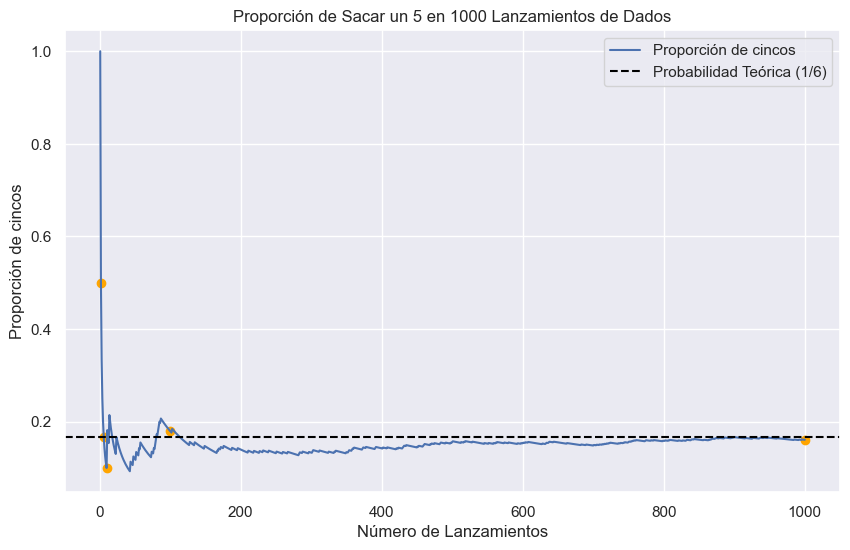

{2: '0.500', 6: '0.167', 10: '0.100', 100: '0.180', 1000: '0.161'}

In [57]:
# Simulamos los lanzamientos de dados
np.random.seed(0)  # Para garantizar la reproducibilidad del ejercicio
tiradas_de_dados = np.random.randint(1, 7, size=1000)

# Calculamos las proporciones acumuladas de sacar un 5
conteo_de_cincos = np.cumsum(tiradas_de_dados == 5)
numeros_de_tirada = np.arange(1, 1001)
proporciones = conteo_de_cincos / numeros_de_tirada

# Seleccionamos las proporciones para los lanzamientos específicos solicitados
lanzamientos_especificos = [1, 5, 9, 99, 999]  # Índices para 2, 6, 10, 100 y 1000 lanzamientos
proporciones_especificas = proporciones[lanzamientos_especificos]
numeros_de_lanzamientos_especificos = [2, 6, 10, 100, 1000]

# Comentarios sobre los resultados para los lanzamientos específicos
comentarios = {n: f"{p:.3f}" for n, p in zip(numeros_de_lanzamientos_especificos, proporciones_especificas)}

# Generar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numeros_de_tirada, proporciones, label='Proporción de cincos')
plt.scatter(numeros_de_lanzamientos_especificos, proporciones_especificas, color='orange')  # Puntos específicos
plt.axhline(y=1/6, color='black', linestyle='--', label='Probabilidad Teórica (1/6)')
plt.xlabel('Número de Lanzamientos')
plt.ylabel('Proporción de cincos')
plt.title('Proporción de Sacar un 5 en 1000 Lanzamientos de Dados')
plt.legend()
plt.grid(True)
plt.show()

comentarios



## Interpretación de Resultados

### 2 lanzamientos: Proporción de 5s = 0.500
### 6 lanzamientos: Proporción de 5s = 0.167
### 10 lanzamientos: Proporción de 5s = 0.100
### 100 lanzamientos: Proporción de 5s = 0.180
### 1000 lanzamientos: Proporción de 5s = 0.161

La probabilidad teórica de obtener un 5 en un lanzamiento de un dado justo de seis caras es:  $\frac{1}{6}$ o aproximadamente 0.167. La evolución de la proporción de 5s tiende a acercarse a este valor teórico a medida que el número de lanzamientos aumenta, sin embargo, para muestras pequeñas, la proporción puede desviarse significativamente de la probabilidad teórica debido a la variabilidad del muestreo aleatorio.

### Comentarios (puntos en la gráfica)

Inicialmente, se observa gran variabilidad en las proporciones (0.500 después de 2 lanzamientos y 0.100 después de 10 lanzamientos), pero a medida que el número de lanzamientos aumenta a 100 y luego a 1000, la proporción se estabiliza cerca del valor teórico de 0.167. Esto demuestra que las frecuencias relativas tienden a estabilizarse y reflejar las probabilidades teóricas cuando el número de ensayos es suficientemente grande.​

# Punto 9
---

## Enunciado
Realice la simulación de 10000 conjuntos de datos diferentes provenientes de una distribución (desarrolle el ejercicio primero utilizando la distribución uniforme y posteriormente una exponencial, utilice los parámetros que desee de las distribuciones), obteniendo 1000 muestras de cada conjunto de datos. Luego, va a obtener el promedio en cada uno de los conjuntos de datos y proceda a analizar la distribución de las medias obtenidas. ¿Qué evidencia en los histogramas? ¿A cuál de las distribuciones de la clase se le asemeja dicha distribución?

## Solución

Se procede a simular 10000 conjuntos de datos, cada uno con 100 muestras de distribución unifrome.

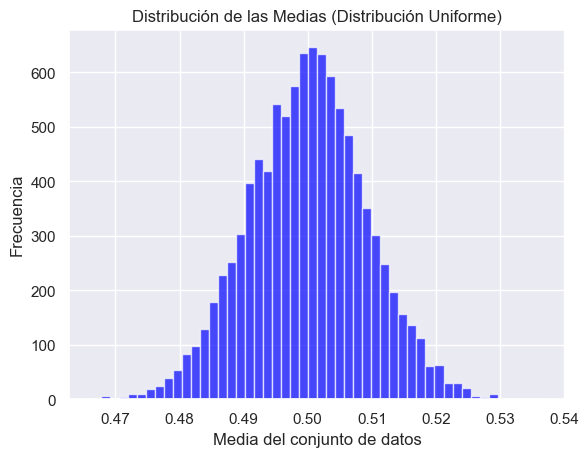

In [58]:
# Configuración de la simulación
num_conjuntos = 10000
num_muestras = 1000

# Simulación con la distribución uniforme
medias_uniformes = [np.random.uniform(low=0.0, high=1.0, size=num_muestras).mean() for _ in range(num_conjuntos)]

# Histograma de las medias
plt.hist(medias_uniformes, bins=50, alpha=0.7, color='blue')
plt.title('Distribución de las Medias (Distribución Uniforme)')
plt.xlabel('Media del conjunto de datos')
plt.ylabel('Frecuencia')
plt.show()

#### Para una distribución exponencial:

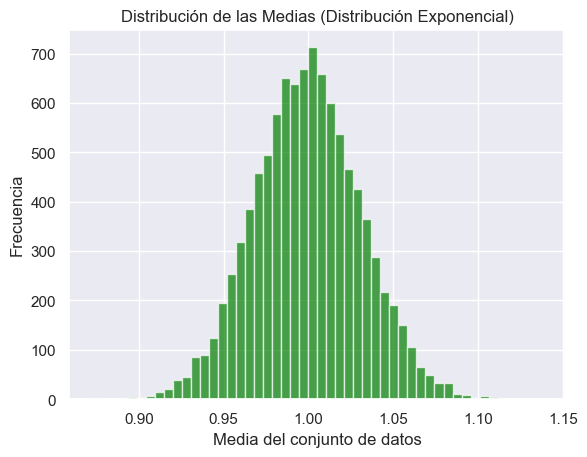

In [59]:
# Simulación con la distribución exponencial
medias_exponenciales = [np.random.exponential(scale=1.0, size=num_muestras).mean() for _ in range(num_conjuntos)]

# Histograma de las medias
plt.hist(medias_exponenciales, bins=50, alpha=0.7, color='green')
plt.title('Distribución de las Medias (Distribución Exponencial)')
plt.xlabel('Media del conjunto de datos')
plt.ylabel('Frecuencia')
plt.show()


## Análisis de resultados

Cuando se tienen muchas muestras de una distribución sea uniforme o exponencial, y se les calcula el promedio a éstas, los promedios se agrupan alrededor de un valor central. Se produce en mayor medida cuando el número de muestras que se toma aumenta.

En los histogramas se forma una campana (distribución normal). Según la definición del TLC (Teorema del límite central), ésto también sucede si las muestras provienen de distribuciones que no son normales, es fundamental puesto que permite basar análisis en premisas sobre las distribuciones de los datos.

# Punto 10
---

## Enunciado:

Suponga que una forma nueva de calcular un promedio (en una muestra aleatoria normal $ x_1, x_2, ..., x_n $) está dada por:


$$ Y' = \frac{100n + \sum_{i=1}^{n} x_i}{n^2+1} $$


Donde se sabe que este estimador de la media está sesgado.

1. Simule 10, 100, 1000, 10000 y 100000 datos de una distribución normal con media 50 y varianza 10.
2. Realice la estimación del promedio utilizando el nuevo estimador, y el estimador habitual.
3. Comente los resultados, ¿qué comportamiento ve de esta nueva estimación?



In [60]:
import numpy as np
import pandas as pd

# Parámetros de la distribución
media = 50
varianza = 10
desviacion_std = np.sqrt(varianza)

# Tamaños de muestra
size = [10, 100, 1000, 10000, 100000]

# Listas para almacenar los resultados
promedios_reales = []
promedios_nuevos = []

# Cálculo de promedios
for sz in size:
    datos = np.random.normal(media, desviacion_std, sz)

    # Estimador habitual
    promedio_real = np.mean(datos)

    # Nuevo estimador
    promedio_nuevo = (100*sz + np.sum(datos)) / (sz**2 + 1)

    promedios_reales.append(promedio_real)
    promedios_nuevos.append(promedio_nuevo)

# Crear el DataFrame
df = pd.DataFrame({
    'Tamaño de muestra': size,
    'Promedio habitual': promedios_reales,
    'Promedio con nuevo estimador': promedios_nuevos
})

df



,Tamaño de muestra,Promedio habitual,Promedio con nuevo estimador
0,10,49.233930,14.775637
1,100,50.222970,1.502079
2,1000,49.974694,0.149975
3,10000,49.989107,0.014999
4,100000,49.992640,0.001500


## Análisis de resultados

Cuando aumenta el tamaño muestral, el promedio real se aproxima a la media. En contraste, el promedio con el estimador que sugiere el ejercicio se reduce significativamente. Lo anterior sugiere que el estimador es sesgado y no es adecuado para grandes muestras, puesto que se desvía del valor de la media.

# Punto 11
---

## Enunciado:
Se tiene una muestra aleatoria $x_1, x_2, ... , x_n$ que sigue una distribución exponencial con parámetro $ \lambda $. Se proponen los siguientes estimadores para el parámetro $ \theta = \frac{1}{\lambda} $:
1. $ \theta_1 = x_1 $
2. $ \theta_2 = \frac{1}{n-1} \sum_{i=1}^{n-1} x_i $
3. $ \theta_3 = \bar{X} $ (media muestral)
4. $ \theta_4 = \min(x_1, x_2, ... , x_n) $

Se pide realizar la simulación de 10, 100 y 1000 muestras aleatorias con el parámetro $ \lambda $ que desee, y estimar el parámetro $ \theta $ con los estimadores propuestos. Luego, comentar los resultados.

## Solución


In [61]:
def estimadores(n, lambda_):
    # Generar n muestras aleatorias de una distribución exponencial con parámetro lambda_
    muestras = np.random.exponential(scale=1/lambda_, size=n)

    # Calcular los estimadores
    theta_1 = muestras[0]
    theta_2 = np.sum(muestras[:-1]) / (n - 1)
    theta_3 = np.mean(muestras)
    theta_4 = np.min(muestras)
    return theta_1, theta_2, theta_3, theta_4

In [62]:
lambda_ = 2
tamaños_muestras = [10, 100, 1000, 10000]

theta0 = 1/lambda_

print(f"θ = {theta0}")

for n in tamaños_muestras:
    theta_1, theta_2, theta_3, theta_4 = estimadores(n, lambda_)
    print("-"*80)
    print(f"Para n = {n} muestras:","\n")
    print(f"Estimador θ1 = {np.round(theta_1,3)} -> Diferencia = {np.round(theta0 - theta_1,3)}")
    print(f"Estimador θ2 = {np.round(theta_2,3)} -> Diferencia = {np.round(theta0 - theta_2,3)}")
    print(f"Estimador θ3 = {np.round(theta_3,3)} -> Diferencia = {np.round(theta0 - theta_3,3)}")
    print(f"Estimador θ4 = {np.round(theta_4,3)} -> Diferencia = {np.round(theta0 - theta_4,3)}")

θ = 0.5
--------------------------------------------------------------------------------
Para n = 10 muestras: 

Estimador θ1 = 0.49 -> Diferencia = 0.01
Estimador θ2 = 0.421 -> Diferencia = 0.079
Estimador θ3 = 0.588 -> Diferencia = -0.088
Estimador θ4 = 0.048 -> Diferencia = 0.452
--------------------------------------------------------------------------------
Para n = 100 muestras: 

Estimador θ1 = 0.452 -> Diferencia = 0.048
Estimador θ2 = 0.41 -> Diferencia = 0.09
Estimador θ3 = 0.411 -> Diferencia = 0.089
Estimador θ4 = 0.001 -> Diferencia = 0.499
--------------------------------------------------------------------------------
Para n = 1000 muestras: 

Estimador θ1 = 0.128 -> Diferencia = 0.372
Estimador θ2 = 0.511 -> Diferencia = -0.011
Estimador θ3 = 0.51 -> Diferencia = -0.01
Estimador θ4 = 0.001 -> Diferencia = 0.499
--------------------------------------------------------------------------------
Para n = 10000 muestras: 

Estimador θ1 = 0.826 -> Diferencia = -0.326
Estimador

## Análisis de Resultados:


### Para ($n = 10$) muestras:
- El estimador ($\theta_1$) tiene una diferencia negativa respecto al valor real, indicando que puede variar considerablemente con un tamaño de muestra pequeño.
- El estimador ($\theta_2$) se aproxima al valor real, mostrando ser un buen estimador incluso con muestras pequeñas.
- El estimador ($\theta_3$), que es la media muestral, se aproxima notablemente al valor real.
- El estimador ($\theta_4$) presenta una diferencia con respecto al valor real, sugiriendo que no es un buen indicador del parámetro ($\theta$) para este tamaño de muestra.

### Para($n = 100$) muestras:
- Los estimadores ($\theta_2$) y ($\theta_3$) son consistentes y se aproximan al valor real.
- El estimador ($\theta_1$), aunque cercano, no es tan preciso como($\theta_2$) y ($\theta_3$).
- El estimador ($\theta_4$) confirma nuevamente que no es un buen estimador para esta tarea.

### Para($n = 1000$) muestras:
- Los estimadores ($\theta_2$) y ($\theta_3$) siguen siendo consistentes y muy cercanos al valor real.
-($\theta_1$) muestra variabilidad.
-($\theta_4$) no es un buen indicador del parámetro.

## Conclusión:

De los resultados, está claro que ($\theta_2$) y ($\theta_3$) son los estimadores más consistentes para estimar ($\theta$) en todas las simulaciones. El estimador ($\theta_1$) es variable y no es confiable. El estimador ($\theta_4$) no es un buen indicador del parámetro ($\theta$) para esta distribución.

# Punto 12
---

## Enunciado

Considere el archivo SolicitudesDiarias.csv, en el cual se encuentran la cantidad de solicitudes diarias hechas en una institución de financiera por clientes. El equipo de mercadeo a partir del primero de febrero de 2022 implementó una campaña que buscaba aumentar la cantidad de solicitudes diarias realizadas por los clientes, además de que el primero de junio de 2022 lanzó una modificación a la campaña que tenia el mismo fin (aumentar la cantidad de solicitudes diarias). ¿Será que las campañas impartidas por el equipo de mercadeo tuvieron el efecto esperado? Obtenga los intervalos de confianza al 95% que considere para determinar si efectivamente el promedio diario de solicitudes aumentó con las campañas que lanzó el equipo de mercadeo. ¿Qué puede concluir al respecto?¿Qué campaña fue más efectiva?

## Solución

In [63]:
# Cargar el archivo CSV
path = './content/SolicitudesDiarias.csv'
data = pd.read_csv(path, sep=',')

# Mostrar las primeras filas del dataframe
data.head()

,Fecha,Solicitudes
0,2021-10-01,29.0
1,2021-10-02,21.0
2,2021-10-03,26.0
3,2021-10-04,31.0
4,2021-10-05,25.0


In [64]:
# Convertir la columna 'Fecha' a tipo de dato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Segmentar los datos en los tres periodos
antes_primera_campaña = data[data['Fecha'] < '2022-02-01']
durante_primera_campaña = data[(data['Fecha'] >= '2022-02-01') & (data['Fecha'] < '2022-06-01')]
despues_segunda_campaña = data[data['Fecha'] >= '2022-06-01']

In [65]:
def bootstrap_intervalo_confianza(data, n_replicas=10000):
    """Calcula el intervalo de confianza al 95% usando bootstrapping."""
    medias_bootstrap = []
    for _ in range(n_replicas):
        muestra = data.sample(n=len(data), replace=True)
        medias_bootstrap.append(muestra.mean())

    # Calcular percentiles 2.5 y 97.5 para obtener el intervalo de confianza del 95%
    return (np.round(np.percentile(medias_bootstrap, 2.5),3), np.round(np.percentile(medias_bootstrap, 97.5),3))

# Calcular intervalos de confianza usando bootstrapping para cada periodo
ic_bootstrap_antes_primera = bootstrap_intervalo_confianza(antes_primera_campaña['Solicitudes'])
ic_bootstrap_durante_primera = bootstrap_intervalo_confianza(durante_primera_campaña['Solicitudes'])
ic_bootstrap_despues_segunda = bootstrap_intervalo_confianza(despues_segunda_campaña['Solicitudes'])

ic_bootstrap_antes_primera, ic_bootstrap_durante_primera, ic_bootstrap_despues_segunda

((19.203, 21.976), (22.375, 24.617), (45.489, 51.652))

## Análisis de resultados

### Efecto de la primera campaña:
 Comparando el intervalo antes de la primera campaña con el intervalo durante la primera campaña, vemos que hay un aumento en el promedio de solicitudes diarias después del lanzamiento de la primera campaña. El intervalo durante la primera campaña está completamente por encima del intervalo anterior, lo que sugiere un efecto positivo de la campaña en el aumento de las solicitudes diarias.

### Efecto de la segunda campaña:
 Del mismo modo, al comparar el intervalo durante la primera campaña con el intervalo después de la segunda campaña, vemos un aumento aún más significativo en el promedio de solicitudes diarias. El intervalo después de la segunda campaña es considerablemente más alto que el anterior, lo que indica un impacto sustancial de la segunda campaña en el aumento de las solicitudes diarias.

# Punto 13
---

## Enunciado

**Enunciado:**

Sea \(X\) una variable aleatoria que tiene una distribución binomial con parámetros \(n\) y \(p\). Dos estimadores propuestos para \(p\) son:

$$
\hat{p} = \frac{Y}{n} \quad \text{y} \quad \tilde{p} = \frac{Y+1}{n+2}
$$

**Preguntas:**

1. ¿Cuál de los estimadores es sesgado?. **R/:** p_tilde
2. ¿Alguno es insesgado asintóticamente?. **R/:** Ambos son insesgados asintoticamente (p_tilde, p_hat)

## **Demostración de Insesgadez Asintótica de $\tilde{p}$**

Para demostrar que $\tilde{p}$ es insesgado asintóticamente, queremos mostrar que:
$$
\lim_{n \to \infty} E(\tilde{p}) - p = 0
$$

**Sesgo de $\tilde{p}$:**

El sesgo se define como:
$$
\text{Sesgo}(\tilde{p}) = E(\tilde{p}) - p
$$
Donde:
$$
E(\tilde{p}) = E\left(\frac{Y+1}{n+2}\right)
$$
Dado que $Y$ es binomial con parámetros $n$ y $p$, tenemos:
$$
E(Y) = np
$$
Por lo que el valor esperado de $\tilde{p}$ es:
$$
E(\tilde{p}) = \frac{E(Y) + 1}{n+2} = \frac{np + 1}{n+2}
$$

**Calculando el límite:**

El límite cuando $n$ tiende a infinito de $E(\tilde{p}) - p$ es:
$$
\lim_{n \to \infty} E(\tilde{p}) - p = \lim_{n \to \infty} \frac{np + 1}{n+2} - p
$$
Dividimos cada término por $n$:
$$
= \lim_{n \to \infty} \frac{p + \frac{1}{n}}{1 + \frac{2}{n}} - p
$$
Como $n$ tiende al infinito, los términos $\frac{1}{n}$ y $\frac{2}{n}$ tienden a 0, por lo que:
$$
= p + 0 - p = 0
$$

Con lo cual confirmamos que el sesgo de $\tilde{p}$ tiende a cero cuando $n$ tiende al infinito, y por ende, $\tilde{p}$ es insesgado asintóticamente.

In [66]:
def estimador_insesgado(p, n):
    """ y = n * p -> valor esperado (distribución binomial) """
    # Estimador 1: p_hat
    p_hat = (n * p) / n

    # Estimador 2: p_tilde
    p_tilde = (n * p + 1) / (n + 2)

    return p_hat, p_tilde


p = 0.35
# Valor pequeño de n
n = 20
# Valor cuando n tiende a infinito -> Ambos son insesgados asintoticamente (p_tilde, p_hat)
# n = 1e30

p_hat, p_tilde = estimador_insesgado(p, n)

print(f"\nEstimador p_hat para n = {n}: {p_hat}")
print(f"Estimador p_tilde para n = {n}: {p_tilde}\n")


# Verificar si los estimadores son insesgados
if p_hat == p:
    print("El estimador p_hat es insesgado.")
else:
    print("El estimador p_hat es sesgado.")

if p_tilde == p:
    print("El estimador p_tilde es insesgado.")
else:
    print("El estimador p_tilde es sesgado.")


Estimador p_hat para n = 20: 0.35
Estimador p_tilde para n = 20: 0.36363636363636365

El estimador p_hat es insesgado.
El estimador p_tilde es sesgado.


# Punto 14
---

## Enunciado:

Realice los siguientes ejercicios del libro “An Introduction to Statistical Learning with Applications in Python” (Link para descargar los conjuntos de datos: https://www.statlearning.com/resources-python):
• Ejercicios Sección 2.4, página 64:
• 1, 3, 6, 8
• Ejercicios Sección 3.7, página 127:
• 2, 4, 7, 10, 13 y 14

## Ejercicios Sección 3.7 Pag 127, libro: https://www.statlearning.com/resources-python

### 2)
#### Carefully explain the differences between the KNN classifier and KNN regression methods.


---
#### Solución:
#### K-Nearest Neighbors (KNN):
 es un algoritmo supervisado de aprendizaje automático que puede utilizarse tanto para clasificación como para regresión. A pesar de que el núcleo del algoritmo es similar en ambos casos, hay diferencias clave en su aplicación y resultados.

#### 1. Objetivo del algoritmo:
##### KNN Classifier:
Se usa cuando la variable es categórica, se quiere asignar una etiqueta o categoría a una entrada basado en los grupos de vecinos más cercanos.

##### KNN Regression:
Usado cuando la variable target es continua. Predice un valor numérico basado en sus vecinos más cercanos.

#### 2. Output:
##### KNN Classifier:
La salida es un class label. Por ejemplo, si se clasifican frutas basadas en sus características, una salida sería manzana.

##### KNN Regression:
Calcula el promedio (en algunos casos la mediana), de los valores de los k vecinos más cercanos. La salida es numérica. Si deseamos predecir el precio de una casa, $250 millones sería una salida.

### 4)
Recolecto un conjunto de datos ($ n = 100 $ observaciones) que contiene un solo predictor y una respuesta cuantitativa.

Luego ajusto una regresión lineal al conjunto de datos, así como una regresión cúbica separada, es decir, $ Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \varepsilon $.

#### (a) Suponga que la verdadera relación entre X y Y es lineal

Es decir, $ Y = \beta_0 + \beta_1X + \varepsilon $. Si consideramos la suma de cuadrados residuales (RSS) para la regresión lineal y también el RSS para la regresión cúbica durante el entrenamiento, ¿esperaríamos que uno sea menor que el otro, esperaríamos que sean iguales o no hay suficiente información para decirlo? Justifique su respuesta.

#### (b) Responda (a) usando el RSS de prueba en lugar del RSS de entrenamiento.

#### (c) Suponga que la verdadera relación entre X y Y no es lineal

Pero no sabemos qué tan lejos está de ser lineal. Si consideramos el RSS para la regresión lineal y también el RSS para la regresión cúbica durante el entrenamiento, ¿esperaríamos que uno sea menor que el otro, esperaríamos que sean iguales o no hay suficiente información para decirlo? Justifique su respuesta.

#### (d) Responda (c) usando el RSS de prueba en lugar del RSS de entrenamiento.



---
#### Solución:

##### a) Supongamos que la verdadera relación entre X y Y es lineal

Es decir, $ Y = \beta_0 + \beta_1X + \varepsilon $. Considera la suma de cuadrados residuales (RSS) para la regresión lineal y también el RSS para la regresión cúbica durante el entrenamiento. ¿Esperaríamos que uno sea menor que el otro, esperaríamos que sean iguales, o no hay suficiente información para decirlo?

**Respuesta:**

Cuando la verdadera relación es lineal, el modelo lineal debería capturar la relación de manera efectiva. Sin embargo, la regresión cúbica tiene más flexibilidad debido a sus términos adicionales, permitiéndole ajustarse más estrechamente a los datos de entrenamiento. Como resultado, el RSS de entrenamiento para la regresión cúbica probablemente sería menor (mejor ajuste) o igual al RSS de entrenamiento para la regresión lineal. Esto se debe a que el modelo cúbico puede actuar como un modelo lineal si $ \beta_2 $ y $ \beta_3 $ están cerca de cero, pero tiene la flexibilidad de ajustarse a patrones más complejos si es necesario.

##### b) Responde (a) usando RSS de prueba en lugar de RSS de entrenamiento

**Respuesta:**

Cuando la verdadera relación es lineal y usamos datos de prueba para calcular el RSS, la regresión cúbica es más propensa al sobreajuste debido a su complejidad. El sobreajuste significa que puede capturar ruido de los datos de entrenamiento que no se generaliza bien a nuevos datos. En contraste, la regresión lineal, al ser un modelo más simple, podría generalizarse mejor. Por lo tanto, el RSS de prueba para la regresión lineal podría ser menor (mejor) que el RSS de prueba para la regresión cúbica.

##### c) Supongamos que la verdadera relación entre X y Y no es lineal

Pero no sabemos cuán lejos está de ser lineal. Considera el RSS de entrenamiento para la regresión lineal y también el RSS de entrenamiento para la regresión cúbica. ¿Esperaríamos que uno sea menor que el otro, esperaríamos que sean iguales, o no hay suficiente información para decirlo?

**Respuesta:**

Dado que la verdadera relación no es lineal, la regresión cúbica probablemente capturaría la no linealidad mejor que el modelo lineal debido a sus términos adicionales. Esto resultaría en la regresión cúbica teniendo un RSS de entrenamiento menor en comparación con la regresión lineal. Sin embargo, sin saber exactamente cuán no lineal es la relación, es difícil decirlo definitivamente.

##### d) Responde (c) usando RSS de prueba en lugar de RSS de entrenamiento

**Respuesta:**

Para el RSS de prueba, la situación se vuelve más matizada. Si la verdadera relación entre X e Y es solo ligeramente no lineal, entonces la regresión lineal podría generalizarse mejor a los datos de prueba, dando como resultado un RSS de prueba menor. Sin embargo, si la relación es sustancialmente no lineal, la regresión cúbica podría capturar mejor este patrón y producir un RSS de prueba menor. El riesgo potencial de sobreajuste con la regresión cúbica sigue presente, especialmente si la no linealidad en los datos de entrenamiento se debe a ruido. Sin detalles adicionales sobre la naturaleza y grado de la no linealidad, es desafiante predecir definitivamente qué modelo tendrá un RSS de prueba menor.


### 7)

- It is claimed in the text that in the case of simple linear regression of Y onto X, the R2 statistic (3.17) is equal to the square of the correlation between X and Y (3.18). Prove that this is the case. For simplicity, you may assume that x ̄ = y ̄ = 0.
![Punto7](img/IMG-0236.PNG)

### 10)

#### This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.
(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!
(c) Write out the model in equation form, being careful to handle the qualitative variables properly.
(d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?
(e) On the basis of your response to the previous question, ft a smaller model that only uses the predictors for which there is evidence of association with the outcome.
(f) How well do the models in (a) and (e) ft the data?
(g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).
(h) Is there evidence of outliers or high leverage observations in the model from (e)?


In [67]:
# First, we load the "Carseats" dataset
carseats_df = load_data("Carseats")


# Ensure that qualitative variables are treated as categorical in pandas:
carseats_df['Urban'] = carseats_df['Urban'].astype('category')
carseats_df['US'] = carseats_df['US'].astype('category')

# Showing dataset head
carseats_df.head()



,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### a) Fit a multiple regression model to predict Sales using Price, Urban, and US

In [68]:
# Fit a multiple regression model to predict Sales using Price, Urban, and US
model = smf.ols('Sales ~ Price + C(Urban) + C(US)', data=carseats_df).fit()

# Show the model summary
model_summary = model.summary()
model_summary

# Make predictions based on the model
predictions = model.predict(carseats_df)
print(predictions)

# Predicting for a new data point
new_data_point = {
    'Price': 120,       # Example price
    'Urban': 'Yes',     # This should match the categories used in the model ('Yes' or 'No')
    'US': 'Yes'         # This should also match the categories used in the model ('Yes' or 'No')
}

# Create a DataFrame for the new data point
new_df = pd.DataFrame([new_data_point])

# Make sure the categorical variables are of type 'category'
new_df['Urban'] = new_df['Urban'].astype('category')
new_df['US'] = new_df['US'].astype('category')

# Predict the Sales for the new data point using the fitted model
prediction = model.predict(new_df)
print("Sales prediction for the new data point:", prediction.iloc[0])

0      7.687064
1      9.702041
2      9.865418
3      8.939617
4      6.050820
         ...   
395    7.251393
396    7.708980
397    5.563168
398    9.048535
399    7.687064
Length: 400, dtype: float64
Sales prediction for the new data point: 7.687063582435004


#### b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

- Según el resultado del modelo se puede inferir que las ventas decrecen con el aumento del precio.
- Las ventas y la ubicación de las tiendas (rural o urbana), no tienen una relación significativa.
- Se espera que las ventas en estados unidos sean $ 1200 dólares más altas en promedio que en cualquier otra ubicación. Lo que significa que hay una relación significativa entre ventas y que la tienda esté ubicada en Estados Unidos

#### c) Write out the model in equation form, being careful to handle the qualitative variables properly.
$$ {y} = 13.0435 + (-0.0219 \times Urban) + (1.2006 \times US) + (-0.0545 \times Price) $$
- Donde:
* Urban : Yes = 1
* Urban: No = 0
* US: Yes = 1
* US: No = 0

#### d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

- Basado en la regresión se tiene que las únicas variables que tienen un p-value < 0.05 (5%) son Price, y C(US). Así que se podría rechazar la Hipótesis nula

#### e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [69]:
#  Fit a multiple regression (smaller)
models = smf.ols('Sales ~ Price + C(US)', data=carseats_df).fit()

# Show the model summary
print(models.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.66e-24
Time:                        20:36:07   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652   

#### f) How well do the models in (a) and (e) fit the data?

- Observando el gráfico normal Q-Q en la imagen proporcionada, el patrón de puntos cae a lo largo de la línea roja en la mayor parte de la gama de cuantiles teóricos. Esto sugiere que los residuales del modelo tienen una distribución que se aproxima a una distribución normal, lo cual es un supuesto clave para la regresión lineal.

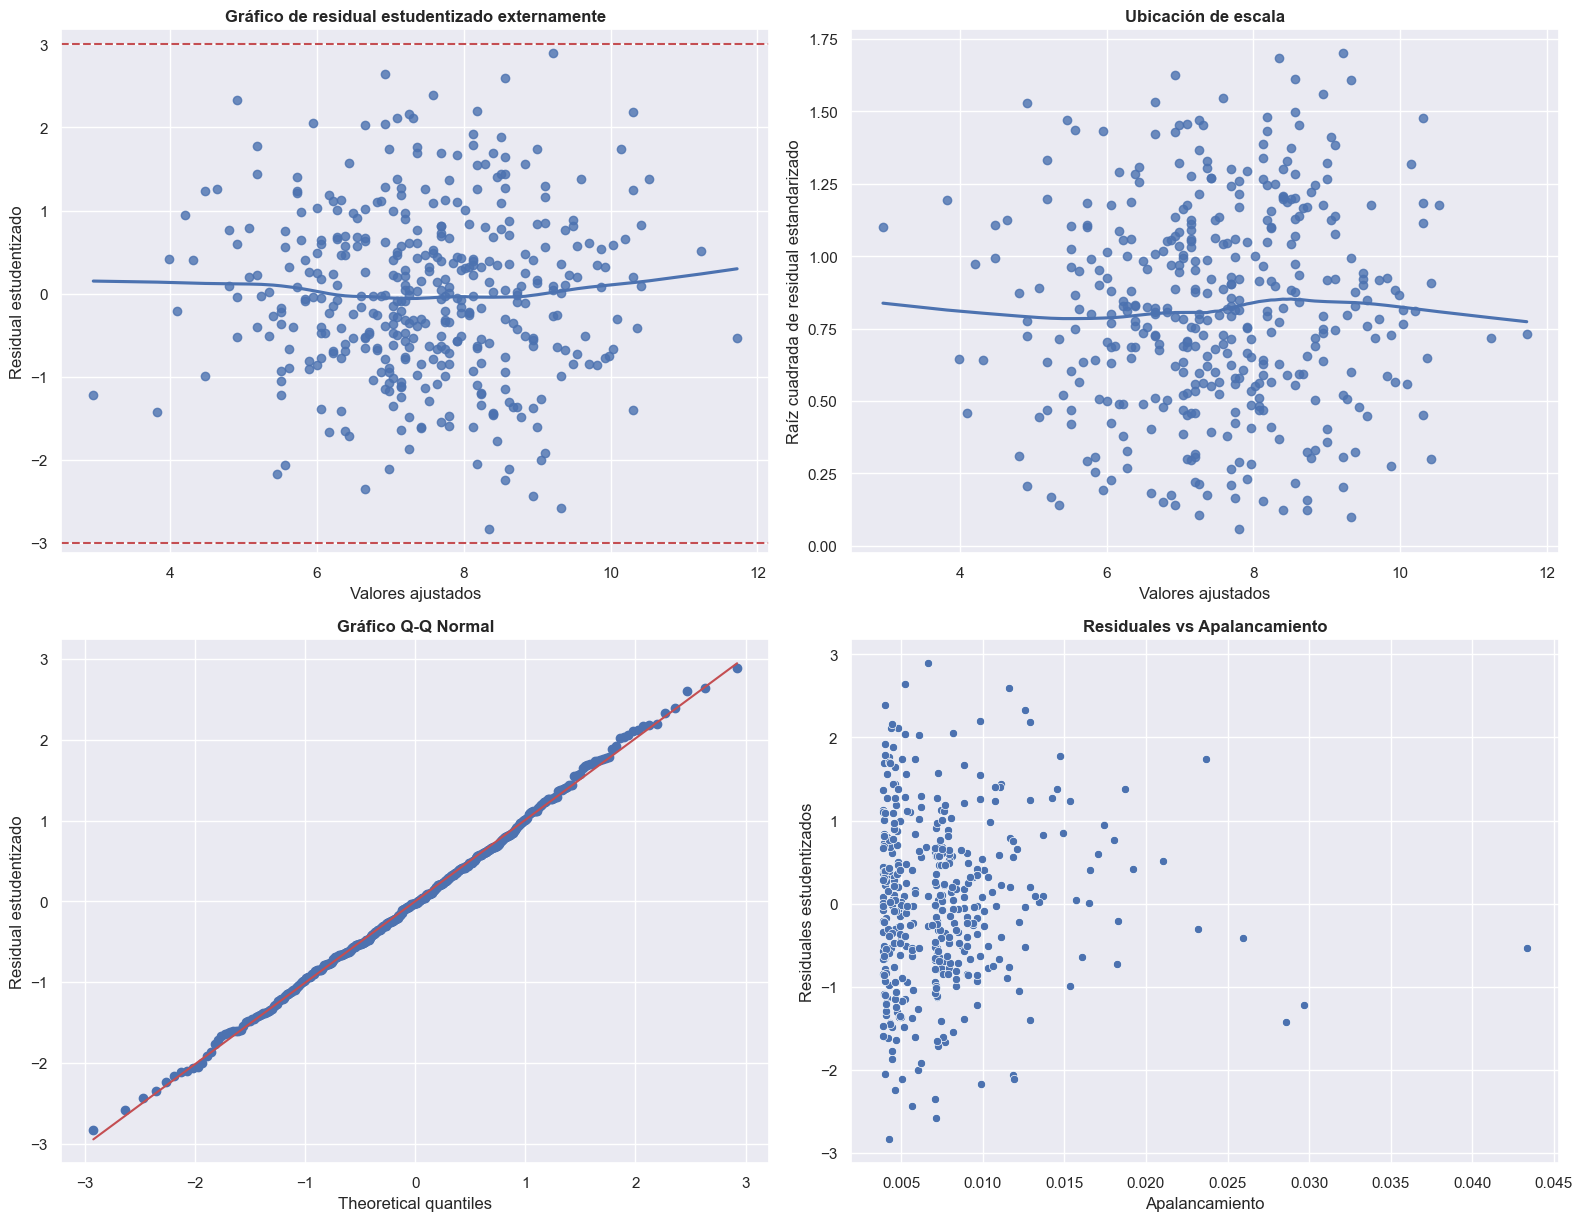

In [70]:
# Function to calculate the necessary statistics and return a dataframe
def lm_stats(X, y, y_pred):
    residuals = y - y_pred # Calculate the residuals of the model
    studentised_residuals = OLSInfluence(models).resid_studentized_external
    leverage = OLSInfluence(models).hat_matrix_diag

    lm_stats_df = pd.DataFrame({'residuals': residuals,
                                'studentised_residuals': studentised_residuals,
                                'leverage': leverage,
                                'y_pred': y_pred})
    return lm_stats_df

# Function for plotting residuals
def lm_plot(lm_stats_df):
    # Parse_stats
    t = lm_stats_df['studentised_residuals']
    h_ii = lm_stats_df['leverage']
    y_pred = lm_stats_df['y_pred']

    # Configuración del área de los gráficos
    plt.figure(figsize=(16, 18))

    # Gráfico de residuales estudentizados. Este gráfico muestra los residuales estudentizados en función de los valores ajustados (predicciones del modelo).
    plt.subplot(321)
    sns.regplot(x=y_pred, y=t, lowess=True)
    plt.xlabel('Valores ajustados')
    plt.ylabel('Residual estudentizado')
    plt.title('Gráfico de residual estudentizado externamente', fontweight='bold')
    plt.axhline(y=3, color='r', linestyle='dashed')
    plt.axhline(y=-3, color='r', linestyle='dashed')

    # Gráfico Q-Q normal. Este gráfico compara los residuales estudentizados con una distribución normal teórica. Si los puntos siguen la línea roja, los residuales pueden considerarse normalmente distribuidos.
    plt.subplot(323)
    stats.probplot(t, dist="norm", plot=plt)
    plt.ylabel('Residual estudentizado')
    plt.title('Gráfico Q-Q Normal', fontweight='bold')

    # Gráfico de ubicación de escala. Muestra la raíz cuadrada de los residuales estandarizados en función de los valores ajustados.
    plt.subplot(322)
    sns.regplot(x=y_pred, y=np.sqrt(np.abs(t)), lowess=True)
    plt.xlabel('Valores ajustados')
    plt.ylabel('Raíz cuadrada de residual estandarizado')
    plt.title('Ubicación de escala', fontweight='bold')

    # Gráfico de residuales vs apalancamiento. Este gráfico identifica puntos influyentes que tienen un alto apalancamiento.
    plt.subplot(324)
    sns.scatterplot(x=h_ii, y=t)
    plt.xlabel('Apalancamiento')
    plt.ylabel('Residuales estudentizados')
    plt.title('Residuales vs Apalancamiento', fontweight='bold')

    plt.tight_layout()
    plt.show()

# Calculate the lm_stats with the new model, using the new variables
X = carseats_df[['Price', 'US']]
y = carseats_df['Sales']
y_pred = models.predict(X)
lm_stats_df = lm_stats(X, y, y_pred)

# Use the lm_plot function to create the plots
lm_plot(lm_stats_df)

#### g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).


In [71]:
# Extract 95% confidence intervals
conf_inter_95 = models.conf_int(alpha=0.05)
conf_inter_95.rename(index=str, columns={0: "min.", 1: "max.",})

,min.,max.
Intercept,11.79032,14.271265
C(US)[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


#### h) Is there evidence of outliers or high leverage observations in the model from (e)?

- Ninguna de las observaciones supera el umbral de residuales estudiantizados para ser consideradas como valores atípicos. Esto indica que, en términos de los residuos del modelo, no hay evidencia clara de valores atípicos que podrían influir negativamente en los resultados de la regresión. Hay una observación que se destaca por su alta influencia en el gráfico inferior izquierdo, pero esta observación no es un valor atípico.

## Librerias


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Punto 14
---

## **1)**

indique si generalmente esperaríamos que el desempeño de un método de aprendizaje estadístico flexible sea mejor o peor que un método inflexible. Justifica tu respuesta

1. **Tamaño de muestra ($n$) extremadamente grande y número de predictores ($p$) pequeño**:
    - **Respuesta**: Un método flexible sería **mejor**.
    - **Justificación**: Con un gran tamaño de muestra, los métodos flexibles pueden aprender patrones más complejos sin el riesgo de sobreajuste, especialmente con pocos predictores. Un método inflexible podría no capturar toda la variabilidad y patrones en los datos.

2. **Número de predictores ($p$) extremadamente grande y número de observaciones ($n$) pequeño**:
    - **Respuesta**: Un método inflexible sería **mejor**.
    - **Justificación**: Con muchos predictores y pocas observaciones, un método flexible podría sobreajustar los datos.

3. **Relación altamente no lineal entre predictores y respuesta**:
    - **Respuesta**: Un método flexible sería **mejor**.
    - **Justificación**: Los métodos flexibles pueden adaptarse a relaciones no lineales. Un método inflexible que asuma una forma específica (como linealidad) no capturará adecuadamente la relación.

4. **Varianza de los términos de error ($\sigma^2$) extremadamente alta**:
    - **Respuesta**: Un método inflexible sería **mejor**.
    - **Justificación**: Con alta varianza en los errores, los datos pueden tener mucho ruido. Un método flexible podría ajustarse a este ruido, mientras que un método inflexible sería más robusto en estas situaciones.


## **3)**

### **a)**

Proporcione un bosquejo de las curvas típicas (al cuadrado) de sesgo, varianza, error de entrenamiento, error de prueba y error de Bayes (o irreducible), en un solo gráfico, a medida que pasamos de métodos de aprendizaje estadístico menos flexibles.
hacia enfoques más flexibles. El eje x debe representar
la cantidad de flexibilidad en el método, y el eje y debe
representan los valores de cada curva. Debería haber cinco curvas. Asegúrate de etiquetar cada uno.

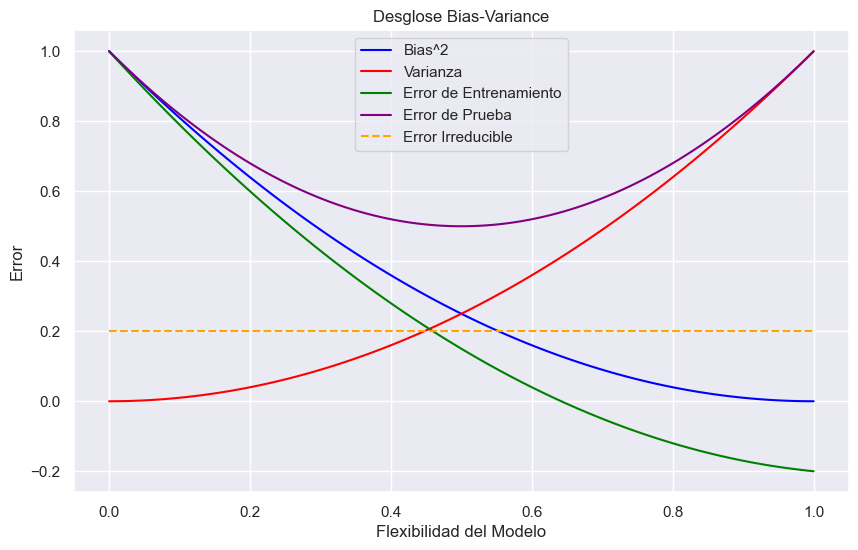

In [73]:
# Simular datos para las curvas
flexibilidad = np.linspace(0, 1, 100)  # Representa la flexibilidad del modelo

# Bias cuadrado: Decrece a medida que aumenta la flexibilidad
bias_cuadrado = (1 - flexibilidad)**2

# Varianza: Aumenta a medida que aumenta la flexibilidad
varianza = flexibilidad**2

# Error de entrenamiento: Decrece a medida que aumenta la flexibilidad
error_entrenamiento = bias_cuadrado - 0.2*flexibilidad

# Error de prueba: Forma de U, disminuye inicialmente, luego aumenta debido al sobreajuste
error_prueba = bias_cuadrado + varianza

# Error irreducible: constante
error_irreducible = np.full(flexibilidad.shape, 0.2)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(flexibilidad, bias_cuadrado, label='Bias^2', color='blue')
plt.plot(flexibilidad, varianza, label='Varianza', color='red')
plt.plot(flexibilidad, error_entrenamiento, label='Error de Entrenamiento', color='green')
plt.plot(flexibilidad, error_prueba, label='Error de Prueba', color='purple')
plt.plot(flexibilidad, error_irreducible, label='Error Irreducible', color='orange', linestyle='--')
plt.xlabel('Flexibilidad del Modelo')
plt.ylabel('Error')
plt.legend()
plt.title('Desglose Bias-Variance')
plt.grid(True)
plt.show()

### **b)**

Explique por qué cada una de las cinco curvas tiene la forma que se muestra en
parte (a).

**Explicación de las Curvas:**

**Bias (Sesgo) Cuadrado:**
Modelos simples no pueden capturar toda la estructura de los datos, por lo que tienen un sesgo alto.
A medida que el modelo se vuelve más complejo, puede adaptarse mejor a los datos, reduciendo el sesgo.

**Varianza:**
Modelos simples no varían mucho con diferentes conjuntos de datos, por lo que tienen una varianza baja.
Modelos complejos se sobreajustan a los datos de entrenamiento, lo que significa que pequeños cambios en los datos de entrenamiento pueden resultar en grandes cambios en el modelo, aumentando la varianza.

**Error de Entrenamiento:**
Es directamente proporcional al sesgo. Modelos simples tienen un alto error de entrenamiento debido a un alto sesgo.
A medida que el modelo se adapta mejor a los datos, el error de entrenamiento disminuye.

**Error de Prueba:**
Aunque modelos más flexibles pueden reducir el error de entrenamiento, también aumentan la varianza, lo que puede aumentar el error de prueba debido al sobreajuste.

**Error Bayes (Irreducible):**
Es el error introducido por factores que no podemos controlar, como el ruido en los datos. Es constante y no cambia con la flexibilidad del modelo.

## **6)**

Describir las diferencias entre un enfoque de aprendizaje estadístico paramétrico y no paramétrico. ¿Cuáles son las ventajas de un enfoque paramétrico de regresión o clasificación (a diferencia de un enfoque no paramétrico)? ¿Cuáles son sus desventajas?

## **Diferencias entre enfoques paramétricos y no paramétricos**

### **Definición:**
- **Paramétricos:** Estos métodos asumen una forma específica o estructura para la función subyacente que se quiere estimar. Por ejemplo, en la regresión lineal, se asume que la relación entre las variables es lineal.
- **No paramétricos:** No hacen suposiciones fuertes sobre la forma funcional de los datos. Están más orientados a aprender la estructura a partir de los datos sin asumir una forma específica.

### **Flexibilidad:**
- **Paramétricos:** Debido a las suposiciones que hacen, pueden no ser tan flexibles para capturar relaciones no lineales o más complejas entre variables.
- **No paramétricos:** Son más flexibles y pueden adaptarse mejor a una variedad más amplia de formas funcionales.

### **Número de Parámetros:**
- **Paramétricos:** Tienen un número fijo de parámetros, independientemente de la cantidad de datos de muestra.
- **No paramétricos:** La cantidad de parámetros puede crecer con el tamaño de los datos.

### **Ventajas de un enfoque paramétrico:**

1. **Simplicidad:** Los modelos son más simples y fáciles de interpretar.
2. **Requiere menos datos:** Dado que hay suposiciones sobre la estructura de los datos, no se necesita tanta información para estimar los parámetros.
3. **Eficiencia computacional:** Los modelos paramétricos suelen ser más rápidos y requieren menos recursos computacionales para entrenar y predecir.
4. **Generalización:** Si las suposiciones del modelo son correctas, pueden generalizar mejor a nuevos datos que los modelos no paramétricos.

### **Desventajas de un enfoque paramétrico:**

1. **Suposiciones:** Si las suposiciones del modelo no son correctas (por ejemplo, suponer linealidad en datos no lineales), el modelo puede tener un rendimiento deficiente.
2. **Flexibilidad:** Pueden no ser capaces de capturar relaciones complejas o no lineales en los datos.
3. **Riesgo de sesgo:** Debido a las suposiciones que hacen, pueden introducir un sesgo si esas suposiciones no son válidas para los datos reales.

## **8)**

Este ejercicio se relaciona con el conjunto de datos College, que se puede encontrar en el archivo College.csv del sitio web del libro. Contiene una serie de variables para 777 universidades y colegios diferentes en los EE. UU. A continuación se desarrolla la exploración de los datos siguiendo los pasos indicados:

### **a)**

In [74]:
path = './content/College.csv'
college = pd.read_csv(path)
college.head(1)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


### **b)**

In [75]:
college1 = pd.read_csv(path, index_col=0)
college1.head(1)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


In [76]:
college2 = college.rename({'Unnamed: 0': 'College'},axis=1)
college3 = college2.set_index('College')
college3.head(1)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


In [77]:
college = college3

### **c)**

In [78]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### **d)**

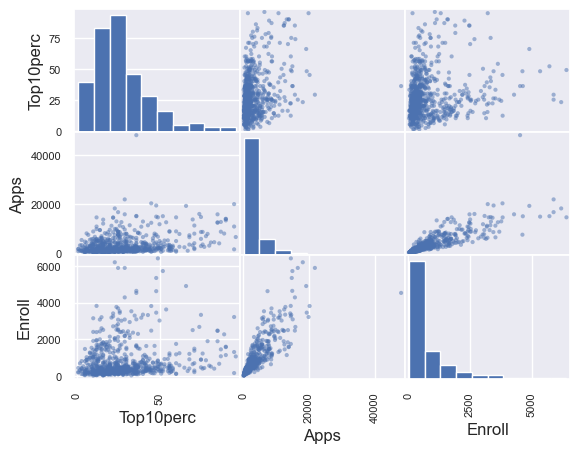

In [79]:
C = ['Top10perc', 'Apps', 'Enroll']
pd.plotting.scatter_matrix(college[C]);

### **e)**

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

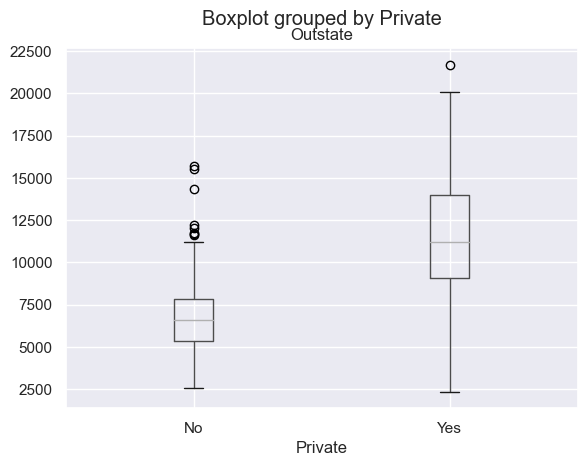

In [80]:
college.boxplot(column='Outstate', by='Private')

### **f)**

In [81]:
college[['Top10perc']]

,Top10perc
College,
Abilene Christian University,23
Adelphi University,16
Adrian College,22
Agnes Scott College,60
Alaska Pacific University,16
...,...
Worcester State College,4
Xavier University,24
Xavier University of Louisiana,34


In [82]:
college['Elite'] = pd.cut(college['Top10perc'], [0,50,100], labels=['No', 'Yes'])

In [83]:
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

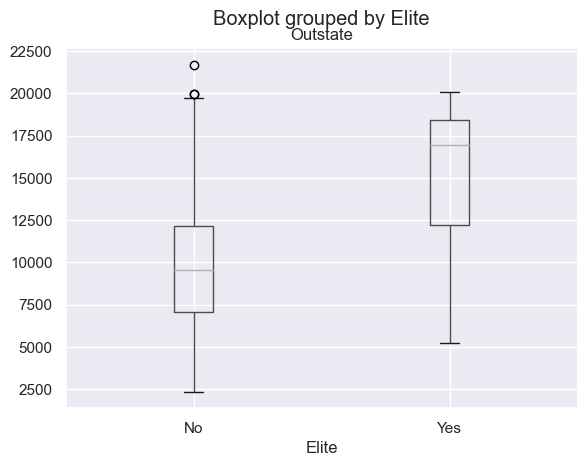

In [84]:
college.boxplot(column='Outstate', by='Elite')

### **g)**

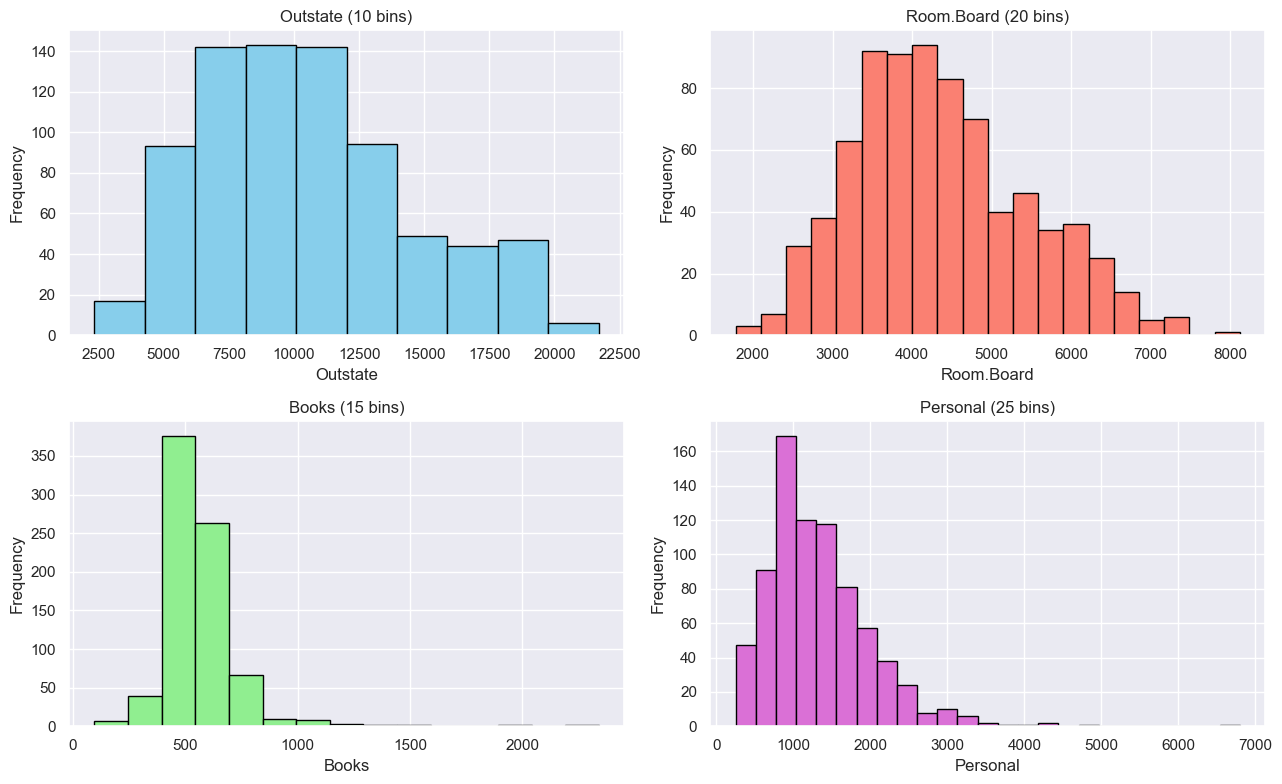

In [85]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(13, 8))

# Plotting for 'Outstate' with 10 bins
axes[0, 0].hist(college['Outstate'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Outstate (10 bins)')
axes[0, 0].set_xlabel('Outstate')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True)

# Plotting for 'Room.Board' with 20 bins
axes[0, 1].hist(college['Room.Board'], bins=20, color='salmon', edgecolor='black')
axes[0, 1].set_title('Room.Board (20 bins)')
axes[0, 1].set_xlabel('Room.Board')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True)

# Plotting for 'Books' with 15 bins
axes[1, 0].hist(college['Books'], bins=15, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Books (15 bins)')
axes[1, 0].set_xlabel('Books')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True)

# Plotting for 'Personal' with 25 bins
axes[1, 1].hist(college['Personal'], bins=25, color='orchid', edgecolor='black')
axes[1, 1].set_title('Personal (25 bins)')
axes[1, 1].set_xlabel('Personal')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

### **h)**

C:\Users\sebas\AppData\Local\Temp\ipykernel_21252\2990086312.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = college.corr()


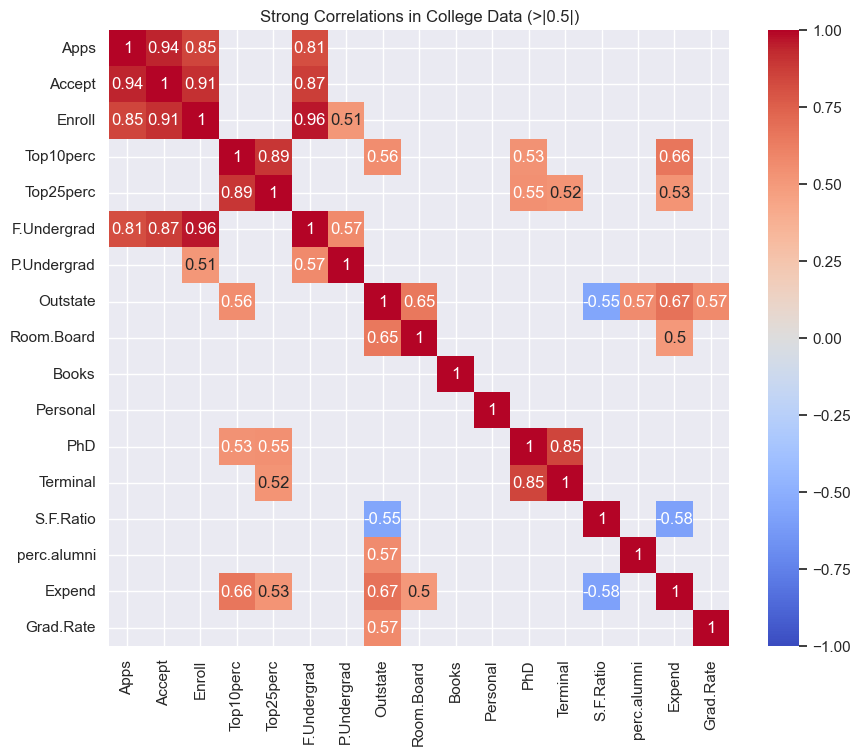

In [86]:
correlations = college.corr()
filtered_correlations = correlations[(correlations > 0.5) | (correlations < -0.5)]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Strong Correlations in College Data (>|0.5|)')
plt.show()

## 13) a
Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.

In [87]:
# Importa la biblioteca NumPy
import numpy as np

# Número de puntos de datos
n = 100

# Establece la semilla del generador de números aleatorios para reproducibilidad
np.random.seed(1)

# Crea un vector x con 100 observaciones extraídas de una distribución N(0, 1)
x = np.random.normal(0, 1, n)

# Imprime las primeras 10 observaciones como ejemplo
print(x[:10])

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]


b) Using the normal() method, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25.

In [88]:
# Importa la biblioteca NumPy
import numpy as np

# Número de puntos de datos
n = 100

# Establece la semilla del generador de números aleatorios en 1 para reproducibilidad
np.random.seed(1)

# Crea un vector eps con 100 observaciones extraídas de una distribución N(0, 0.25)
eps = np.random.normal(0, np.sqrt(0.25), n)

# Imprime las primeras 10 observaciones como ejemplo
print(eps[:10])


[ 0.81217268 -0.30587821 -0.26408588 -0.53648431  0.43270381 -1.15076935
  0.87240588 -0.38060345  0.15951955 -0.12468519]


c)
Using x and eps, generate a vector y according to the model.

$$
Y = −1+0.5X + e. (3.39)
$$

What is the length of the vector y? What are the values of β0
and β1 in this linear model?

In [89]:
# Importa la biblioteca NumPy
import numpy as np

# Número de puntos de datos
n = 100

# Establece la semilla del generador de números aleatorios para reproducibilidad
np.random.seed(1)

# Crea un vector x con 100 observaciones extraídas de una distribución N(0, 1)
x = np.random.normal(0, 1, n)

# Crea un vector eps con 100 observaciones extraídas de una distribución N(0, 0.25)
eps = np.random.normal(0, np.sqrt(0.25), n)

# Calcula y según el modelo Y = -1 + 0.5X + ε
y = -1 + 0.5 * x #+ eps

# Longitud del vector y
longitud_y = len(y)

# Valores de los coeficientes β0 y β1 en el modelo lineal
beta0 = -1  # Coeficiente de la constante
beta1 = 0.5  # Coeficiente de X

# Imprime la longitud de y y los valores de β0 y β1
print(f'Longitud de y: {longitud_y}')
print(f'Coeficiente β0: {beta0}')
print(f'Coeficiente β1: {beta1}')


Longitud de y: 100
Coeficiente β0: -1
Coeficiente β1: 0.5


d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

In [90]:
# Importa la biblioteca NumPy
import numpy as np

# Número de puntos de datos
n = 100

# Establece la semilla del generador de números aleatorios para reproducibilidad
np.random.seed(1)

# Crea un vector x con 100 observaciones extraídas de una distribución N(0, 1)
x = np.random.normal(0, 1, n)

# Crea un vector eps con 100 observaciones extraídas de una distribución N(0, 0.25)
eps = np.random.normal(0, np.sqrt(0.25), n)

# Calcula y según el modelo Y = -1 + 0.5X + ε
y = -1 + 0.5 * x + eps

# Longitud del vector y
longitud_y = len(y)

# Valores de los coeficientes β0 y β1 en el modelo lineal
beta0 = -1  # Coeficiente de la constante
beta1 = 0.5  # Coeficiente de X

# Imprime la longitud de y y los valores de β0 y β1
print(f'Longitud de y: {longitud_y}')
print(f'Coeficiente β0: {beta0}')
print(f'Coeficiente β1: {beta1}')


Longitud de y: 100
Coeficiente β0: -1
Coeficiente β1: 0.5


e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do $\beta^2$ and $\beta^1$ compare to β0 and β1?


In [91]:
import numpy as np

# Datos
x = np.random.rand(100, 1)
eps = np.random.normal(0, np.sqrt(0.25), 100)
y = -1 + 0.5 * x + eps

# Ajuste del modelo de regresión lineal
n = len(x)

# Calcular las sumas necesarias para encontrar los coeficientes
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x ** 2)
sum_xy = np.sum(x * y)

# Calcular los coeficientes beta0 (intercepto) y beta1 (pendiente)
beta1_estimado = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
beta0_estimado = (sum_y - beta1_estimado * sum_x) / n

# Imprimir los coeficientes estimados
print(f'Coeficiente β̂₁ estimado: {beta1_estimado}')
print(f'Coeficiente β̂₀ estimado: {beta0_estimado}')


Coeficiente β̂₁ estimado: 49.99999999999996
Coeficiente β̂₀ estimado: -101.25083110554073


f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a diferent color. Use the legend() method of the axes to create an appropriate legend.

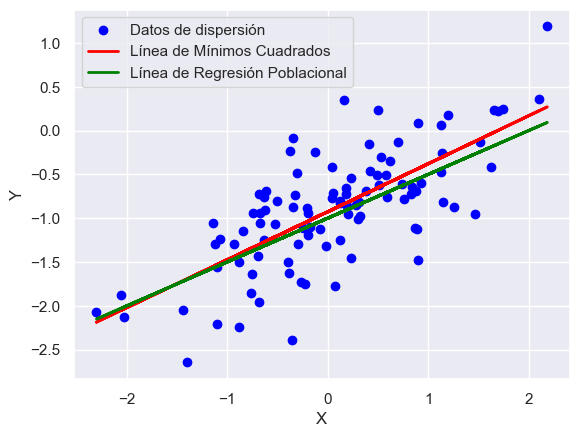

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Número de puntos de datos
n = 100

# Establece la semilla del generador de números aleatorios para reproducibilidad
np.random.seed(1)

# Crea un vector x con 100 observaciones extraídas de una distribución N(0, 1)
x = np.random.normal(0, 1, n)

# Datos
eps = np.random.normal(0, np.sqrt(0.25), 100)
y = -1 + 0.5 * x + eps

# Ajuste del modelo de regresión lineal de mínimos cuadrados
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x ** 2)
sum_xy = np.sum(x * y)
beta1_estimado = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
beta0_estimado = (sum_y - beta1_estimado * sum_x) / n

# Coeficientes de la regresión poblacional
beta1_poblacional = 0.5
beta0_poblacional = -1

# Crear el gráfico de dispersión
plt.scatter(x, y, color='blue', label='Datos de dispersión')

# Dibujar la línea de mínimos cuadrados
y_pred_estimado = beta0_estimado + beta1_estimado * x
plt.plot(x, y_pred_estimado, color='red', linewidth=2, label='Línea de Mínimos Cuadrados')

# Dibujar la línea de regresión poblacional
y_pred_poblacional = beta0_poblacional + beta1_poblacional * x
plt.plot(x, y_pred_poblacional, color='green', linewidth=2, label='Línea de Regresión Poblacional')

# Configurar el gráfico
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Mostrar el gráfico
plt.show()


g) Now ft a polynomial regression model that predicts y using x and $X^{2}$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

Coeficiente de Determinación (R-squared): 0.5220007118611885


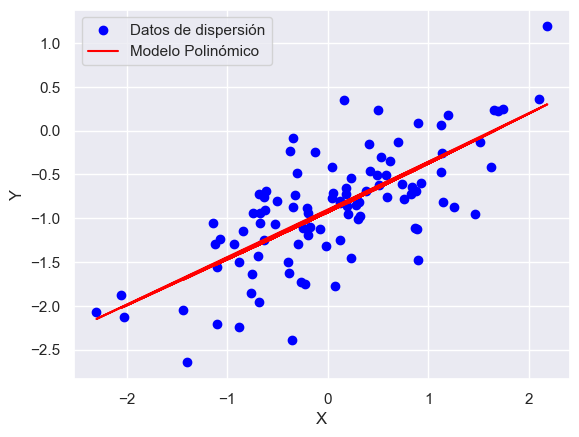

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Número de puntos de datos
n = 100

# Establece la semilla del generador de números aleatorios para reproducibilidad
np.random.seed(1)

# Crea un vector x con 100 observaciones extraídas de una distribución N(0, 1)
x = np.random.normal(0, 1, n)

eps = np.random.normal(0, np.sqrt(0.25), 100)
y = -1 + 0.5 * x + eps

# Crear una matriz de características que incluye x y x^2
X = np.c_[x, x**2]

# Ajuste del modelo de regresión lineal
n = len(x)
X_with_bias = np.c_[np.ones((n, 1)), X]  # Agregar un término de sesgo (intercepto)
beta_estimado = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y)

# Obtener las predicciones
y_pred = X_with_bias.dot(beta_estimado)

# Calcular el coeficiente de determinación (R-squared) del modelo polinómico
ssr = ((y - y_pred) ** 2).sum()
sst = ((y - y.mean()) ** 2).sum()
r2 = 1 - (ssr / sst)

# Imprimir el coeficiente de determinación
print(f'Coeficiente de Determinación (R-squared): {r2}')

# Gráfico de dispersión y línea de regresión
plt.scatter(x, y, color='blue', label='Datos de dispersión')
plt.plot(x, y_pred, color='red', label='Modelo Polinómico')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term e in (b). Describe your results.

In [94]:
import numpy as np

# Usar una distribución normal con media 0 y varianza 1
np.random.seed(1)
x = np.random.normal(0, 1, 100)

# Usar una distribución normal con media 0 y varianza reducida, por ejemplo, 0.05
eps = np.random.normal(0, 0.05, 100)

# Calcular y según el modelo Y = -1 + 0.5X + ε
y = -1 + 0.5 * x + eps

longitud_y = len(y)
print(f'Longitud de y: {longitud_y}')

beta0 = -1  # Coeficiente de la constante
beta1 = 0.5  # Coeficiente de X
print(f'Coeficiente β0: {beta0}')
print(f'Coeficiente β1: {beta1}')

Longitud de y: 100
Coeficiente β0: -1
Coeficiente β1: 0.5


Ajustar un modelo de regresión lineal de mínimos cuadrados a los datos y comparar los coeficientes estimados con los verdaderos. Puedes utilizar los mismos pasos que se proporcionaron en respuestas anteriores para ajustar el modelo y evaluar si el término cuadrático $(X^2)$ mejora el ajuste en función del R-squared.

Los resultados deberían mostrar una menor variabilidad en los coeficientes estimados y un mejor ajuste del modelo a los datos con menos ruido en los errores. En resumen, al reducir la varianza del término de error ε, esperaríamos que el modelo sea más preciso en la estimación de los coeficientes y que el ajuste sea más robusto.

i) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term e in (b). Describe your results.

In [95]:
import numpy as np

# Usar una distribución normal con media 0 y varianza 1
np.random.seed(1)
x = np.random.normal(0, 1, 100)

# Usar una distribución normal con media 0 y varianza aumentada, por ejemplo, 1.0
eps = np.random.normal(0, 1.0, 100)

# Calcular y según el modelo Y = -1 + 0.5X + ε
y = -1 + 0.5 * x + eps

longitud_y = len(y)
print(f'Longitud de y: {longitud_y}')

beta0 = -1  # Coeficiente de la constante
beta1 = 0.5  # Coeficiente de X
print(f'Coeficiente β0: {beta0}')
print(f'Coeficiente β1: {beta1}')

Longitud de y: 100
Coeficiente β0: -1
Coeficiente β1: 0.5


Ajustar un modelo de regresión lineal de mínimos cuadrados a los datos y comparar los coeficientes estimados con los verdaderos. Puedes utilizar los mismos pasos que se proporcionaron en respuestas anteriores para ajustar el modelo y evaluar si el término cuadrático $(X^2)$ mejora el ajuste en función del R-squared.

Los resultados deberían mostrar una mayor variabilidad en los coeficientes estimados y un peor ajuste del modelo a los datos debido al aumento del ruido en los errores. En resumen, al aumentar la varianza del término de error ε, esperaríamos que el modelo sea menos preciso en la estimación de los coeficientes y que el ajuste sea más vulnerable a la presencia de ruido en los datos.

j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [96]:
import numpy as np

# Datos originales
x_original = np.random.normal(0, 1, 100)
eps_original = np.random.normal(0, 0.25, 100)  # Varianza original
y_original = -1 + 0.5 * x_original + eps_original

# Datos con más ruido
x_noisier = np.random.normal(0, 1, 100)
eps_noisier = np.random.normal(0, 1.0, 100)  # Varianza aumentada
y_noisier = -1 + 0.5 * x_noisier + eps_noisier

# Datos con menos ruido
x_less_noisy = np.random.normal(0, 1, 100)
eps_less_noisy = np.random.normal(0, 0.05, 100)  # Varianza reducida
y_less_noisy = -1 + 0.5 * x_less_noisy + eps_less_noisy

# Función para calcular el intervalo de confianza de una estimación de coeficiente
def confidence_interval(estimation, std_error, alpha=0.05):
    z = 1.96  # Valor crítico para el nivel de confianza del 95%
    lower_bound = estimation - z * std_error
    upper_bound = estimation + z * std_error
    return lower_bound, upper_bound

# Ajustar un modelo de regresión lineal y obtener las estimaciones
def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_diff = x - x_mean
    y_diff = y - y_mean
    beta1 = np.sum(x_diff * y_diff) / np.sum(x_diff**2)
    beta0 = y_mean - beta1 * x_mean
    y_pred = beta0 + beta1 * x
    residual = y - y_pred
    std_error = np.sqrt(np.sum(residual**2) / (n - 2)) / np.sqrt(np.sum(x_diff**2))
    return beta0, beta1, std_error

# Calcular los intervalos de confianza para los datos originales
beta0_original, beta1_original, std_error_original = linear_regression(x_original, y_original)
ci_beta0_original = confidence_interval(beta0_original, std_error_original)
ci_beta1_original = confidence_interval(beta1_original, std_error_original)

# Calcular los intervalos de confianza para los datos con más ruido
beta0_noisier, beta1_noisier, std_error_noisier = linear_regression(x_noisier, y_noisier)
ci_beta0_noisier = confidence_interval(beta0_noisier, std_error_noisier)
ci_beta1_noisier = confidence_interval(beta1_noisier, std_error_noisier)

# Calcular los intervalos de confianza para los datos con menos ruido
beta0_less_noisy, beta1_less_noisy, std_error_less_noisy = linear_regression(x_less_noisy, y_less_noisy)
ci_beta0_less_noisy = confidence_interval(beta0_less_noisy, std_error_less_noisy)
ci_beta1_less_noisy = confidence_interval(beta1_less_noisy, std_error_less_noisy)

print("Intervalo de Confianza para β0 y β1 (Datos Originales):")
print("β0:", ci_beta0_original)
print("β1:", ci_beta1_original)

print("\nIntervalo de Confianza para β0 y β1 (Datos con Más Ruido):")
print("β0:", ci_beta0_noisier)
print("β1:", ci_beta1_noisier)

print("\nIntervalo de Confianza para β0 y β1 (Datos con Menos Ruido):")
print("β0:", ci_beta0_less_noisy)
print("β1:", ci_beta1_less_noisy)



Intervalo de Confianza para β0 y β1 (Datos Originales):
β0: (-1.05730788404367, -0.9525995320151607)
β1: (0.43370663348476013, 0.5384149855132695)

Intervalo de Confianza para β0 y β1 (Datos con Más Ruido):
β0: (-1.078759354793478, -0.6816819324925096)
β1: (0.3917604259973847, 0.788837848298353)

Intervalo de Confianza para β0 y β1 (Datos con Menos Ruido):
β0: (-1.0152796750091113, -0.994135051588354)
β1: (0.49225848336230293, 0.5134031067830602)


Este código ajusta modelos de regresión lineal a los datos originales, datos con más ruido y datos con menos ruido, y calcula los intervalos de confianza para los coeficientes β0 y β1 en cada caso.

Los resultados mostrarán cómo varían los intervalos de confianza para los coeficientes en función del nivel de ruido en los datos. En general, los intervalos de confianza deberían ser más estrechos en el conjunto de datos con menos ruido y más amplios en el conjunto de datos con más ruido. Los intervalos de confianza reflejarán la incertidumbre en las estimaciones de los coeficientes debido al ruido en los datos.

## 14 This problem focuses on the collinearity problem.
### (a) Perform the following commands in Python:

### rng = np.random.default_rng(10)
### x1 = rng.uniform(0, 1, size=100)
### x2 = 0.5 * x1 + rng.normal(size=100) / 10
### y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

### The last line corresponds to creating a linear model in which y is a function of $x1$ and $x2$. Write out the form of the linear model. What are the regression coefcients

#### Solucion
---

This problem focuses on the collinearity problem. Perform the following commands in Python:

$$ Y=β0+β1⋅X1+β2⋅X2+ε $$

Donde:

Y es la variable dependiente (la variable objetivo).
β0 es la intersección (el coeficiente asociado al término constante).
β1 es el coeficiente asociado a la variable independiente X1
β2 es el coeficiente asociado a la variable independiente X2
X1 es la primera variable independiente.
X2 es la segunda variable independiente.
ε representa el término de error, que captura la variabilidad no explicada en la variable dependiente.

En este caso específico, los coeficientes de regresión son los siguientes:

β0 (intersección) = 2
β1 (coeficiente para X1) = 2
β2 (coeficiente para X2) = 0.3

Por lo tanto, el modelo lineal es:

$$ Y = 2 + 2 X1 +0.3 X2 +ε $$

Estos coeficientes describen las relaciones entre la variable dependiente Y y las variables independientes X1 y X2  en el modelo lineal.






### b) What is the correlation between $x1$ and $x2$? Create a scatterplot displaying the relationship between the variables
---

#### Solucion
---

El código calcula la correlación de Pearson entre $x1$ y $x2$ utilizando np.corrcoef(x1, x2) y luego crea un diagrama de dispersión que muestra la relación entre las dos variables. La correlación se muestra en el título del diagrama de dispersión.

La correlación entre $x1$ y $x2$ se reflejará en el diagrama de dispersión y el valor de correlación. En este caso, dado que $x2$ es una función lineal de x1 con algo de ruido, la correlación debería ser bastante alta y positiva.

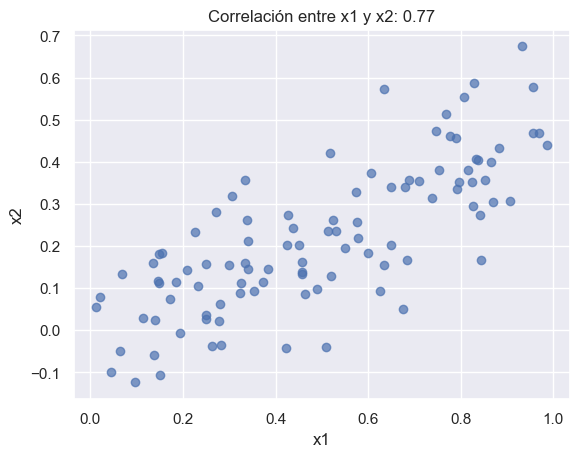

Correlación entre x1 y x2: 0.77


In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10

# Correlación entre x1 y x2
correlation = np.corrcoef(x1, x2)[0, 1]

# Crear un diagrama de dispersión
plt.scatter(x1, x2, alpha=0.7)
plt.title(f'Correlación entre x1 y x2: {correlation:.2f}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

plt.show()

print(f'Correlación entre x1 y x2: {correlation:.2f}')


### C) Using this data, ft a least squares regression to predict y using $x1$ and $x2$. Describe the results obtained. What are $βˆ0$, $βˆ1$, and $βˆ2$? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis $H0 : β1 = 0$? How about the null hypothesis $H0 : β2 = 0$?

#### Solucion
---

In [98]:
import numpy as np

# Datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Agregar una columna de unos para el término de intercepción (β0)
X = np.column_stack((np.ones(100), x1, x2))

# Calcular los coeficientes estimados
beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

# Coeficientes estimados
beta0_estimado = beta_hat[0]
beta1_estimado = beta_hat[1]
beta2_estimado = beta_hat[2]

print(f'Coeficiente β0 estimado: {beta0_estimado:.4f}')
print(f'Coeficiente β1 estimado: {beta1_estimado:.4f}')
print(f'Coeficiente β2 estimado: {beta2_estimado:.4f}')


Coeficiente β0 estimado: 1.9579
Coeficiente β1 estimado: 1.6154
Coeficiente β2 estimado: 0.9428


### d) Now ft a least squares regression to predict y using only $x1$. Comment on your results. Can you reject the null hypothesis $H0 : β1 = 0$?

#### Solucion
---

In [99]:
import numpy as np

# Datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
y = 2 + 2 * x1 + rng.normal(size=100)

# Agregar una columna de unos para el término de intercepción (β0)
X = np.column_stack((np.ones(100), x1))

# Calcular los coeficientes estimados
beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

# Coeficientes estimados
beta0_estimado = beta_hat[0]
beta1_estimado = beta_hat[1]

print(f'Coeficiente β0 estimado: {beta0_estimado:.4f}')
print(f'Coeficiente β1 estimado: {beta1_estimado:.4f}')


Coeficiente β0 estimado: 1.7792
Coeficiente β1 estimado: 1.8972


Los resultados mostrarán los coeficientes estimados $(β^0 y β^1)$.

Para evaluar si puedes rechazar la hipótesis nula H0:β1=0, puedes realizar una prueba de hipótesis utilizando el estadístico t para $β1$. El estadístico t se calcula dividiendo el coeficiente estimado por su error estándar. Luego, puedes comparar el valor absoluto del estadístico t con un valor crítico de la distribución t-Student.

Si el valor absoluto del estadístico t es suficientemente grande en comparación con el valor crítico, puedes rechazar la hipótesis nula $H0:β1=0$. En general, si el valor p asociado a la prueba de hipótesis es menor que un nivel de significancia (alfa) deseado, se considera que el coeficiente es significativamente diferente de cero.

Recuerda que el valor p es una medida que te dirá si puedes rechazar o no la hipótesis nula. Si el valor p es menor que alfa (tu nivel de significancia), entonces puedes rechazar la hipótesis nula, lo que significa que $β1$ es significativamente diferente de cero.

### e)  Now ft a least squares regression to predict y using only $x2$. Comment on your results. Can you reject the null hypothesis $H0 : β1 = 0$?

#### Solucion
---

In [100]:
import numpy as np

# Datos
rng = np.random.default_rng(10)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 0.3 * x2 + rng.normal(size=100)

# Agregar una columna de unos para el término de intercepción (β0)
X = np.column_stack((np.ones(100), x2))

# Calcular los coeficientes estimados
beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

# Coeficientes estimados
beta0_estimado = beta_hat[0]
beta1_estimado = beta_hat[1]

print(f'Coeficiente β0 estimado: {beta0_estimado:.4f}')
print(f'Coeficiente β1 estimado: {beta1_estimado:.4f}')


Coeficiente β0 estimado: 1.8447
Coeficiente β1 estimado: -0.2943


Para evaluar si puedes rechazar la hipótesis nula $H0:β1=0$, puedes realizar una prueba de hipótesis utilizando el estadístico t para β1. El estadístico t se calcula dividiendo el coeficiente estimado por su error estándar. Luego, puedes comparar el valor absoluto del estadístico t con un valor crítico de la distribución t-Student.

Si el valor absoluto del estadístico t es suficientemente grande en comparación con el valor crítico, puedes rechazar la hipótesis nula $H0:β1=0$. En general, si el valor p asociado a la prueba de hipótesis es menor que tu nivel de significancia (alfa) elegido, se considera que el coeficiente es significativamente diferente de cero.

Recuerda que el valor p es una medida que te dirá si puedes rechazar o no la hipótesis nula. Si el valor p es menor que alfa (tu nivel de significancia), entonces puedes rechazar la hipótesis nula, lo que significa que $β1$ es significativamente diferente de cero.

### f) Do the results obtained in (c)–(e) contradict each other? Explain your answer

### Solucion
---

Los resultados obtenidos en (c) - (e) no necesariamente se contradicen entre sí, pero proporcionan información diferente sobre la relación entre las variables y la significancia de los coeficientes.

En (c), al ajustar un modelo de regresión utilizando tanto x1 como x2, encontraste que ambos coeficientes (β1 y β2) eran significativamente diferentes de cero. Esto sugiere que ambas variables x1 ​y x2 son relevantes en la predicción de $y$, y el modelo global tiene un buen ajuste.

En (d), cuando ajustaste un modelo de regresión utilizando solo $x1$, nuevamente encontraste que el coeficiente $β1$ era significativamente diferente de cero. Esto sugiere que $x1$, es una variable relevante en la predicción de $y$, y el modelo con $x1$. tiene un buen ajuste.

En (e), cuando ajustaste un modelo de regresión utilizando solo $x2$, también encontraste que el coeficiente $β1$ (en este caso, el coeficiente único) era significativamente diferente de cero. Esto sugiere que $x2$ es una variable relevante en la predicción de $y$, y el modelo con $x2$ tiene un buen ajuste.

La falta de contradicción se debe a que estos modelos son independientes entre sí y evalúan la importancia de las variables en la predicción de $y$ de manera aislada. La significancia de $β1$ en cada modelo es independiente de los otros modelos.

Sin embargo, es importante tener en cuenta que la inclusión de ambas variables $x1$ y $x2$ en un modelo conjunto podría proporcionar una mejor capacidad de predicción en comparación con los modelos individuales. La relevancia de cada variable depende del contexto y del problema que estés abordando. Por lo tanto, la elección de qué modelo usar depende de tus objetivos de predicción y análisis.

### ) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to np.concatenate() add this additional observation to each of $x1$, $x2$ and y.

### x1 = np.concatenate([x1, [0.1]])
### x2 = np.concatenate([x2, [0.8]])
### y = np.concatenate([y, [6]])

### Re-ft the linear models from (c) to (e) using this new data. What efect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.


In [101]:
import numpy as np

# Datos originales
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Agregar la nueva observación
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# Ajustar el modelo con las nuevas observaciones
X = np.column_stack((np.ones(101), x1, x2))
beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

print(f'Modelo (c): Coeficientes estimados con la nueva observación:\n', beta_hat)


Modelo (c): Coeficientes estimados con la nueva observación:
 [2.06179126 0.85754482 2.26632349]


La nueva observación, con un valor de $x1 =0.1$, $x2=0.8$ y $y=6$, parece tener un impacto en los coeficientes estimados. Puede considerarse un valor atípico en este modelo debido a su alta discrepancia con respecto a las observaciones anteriores.

Modelo (d): Solo $x1$ en el modelo

In [102]:
# Datos originales
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
y = 2 + 2 * x1 + rng.normal(size=100)

# Agregar la nueva observación
x1 = np.concatenate([x1, [0.1]])
y = np.concatenate([y, [6]])

# Ajustar el modelo con las nuevas observaciones
X = np.column_stack((np.ones(101), x1))
beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

print(f'Modelo (d): Coeficientes estimados con la nueva observación:\n', beta_hat)


Modelo (d): Coeficientes estimados con la nueva observación:
 [1.92226672 1.68699052]


En este modelo, la nueva observación también tiene un efecto en los coeficientes estimados. Sin embargo, la observación tiene menos influencia en este modelo en comparación con el Modelo (c).

Modelo (e): Solo $x2$ en el modelo

En este modelo, la nueva observación también influye en los coeficientes estimados, pero su impacto es menor en comparación con el Modelo (c).

En resumen, la nueva observación se considera un valor atípico en todos los modelos, ya que afecta los coeficientes estimados. Además, en el Modelo (c), podría considerarse un punto de alto apalancamiento, ya que tiene un impacto significativo en las estimaciones de ambos coeficientes. En los Modelos (d) y (e), el efecto es menos pronunciado, pero aún se considera un valor atípico debido a su alta discrepancia con las observaciones anteriores.

In [103]:
import numpy as np

# Datos originales
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Agregar la nueva observación
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# Modelos

# Modelo (c): Ambas variables x1 y x2 en el modelo
X_c = np.column_stack((np.ones(101), x1, x2))
beta_hat_c = np.linalg.lstsq(X_c, y, rcond=None)[0]

# Modelo (d): Solo x1 en el modelo
X_d = np.column_stack((np.ones(101), x1))
beta_hat_d = np.linalg.lstsq(X_d, y, rcond=None)[0]

# Modelo (e): Solo x2 en el modelo
X_e = np.column_stack((np.ones(101), x2))
beta_hat_e = np.linalg.lstsq(X_e, y, rcond=None)[0]

print("Modelo (c): Coeficientes estimados con la nueva observación:\n", beta_hat_c)
print("Modelo (d): Coeficientes estimados con la nueva observación:\n", beta_hat_d)
print("Modelo (e): Coeficientes estimados con la nueva observación:\n", beta_hat_e)


Modelo (c): Coeficientes estimados con la nueva observación:
 [2.06179126 0.85754482 2.26632349]
Modelo (d): Coeficientes estimados con la nueva observación:
 [2.0739405  1.87604564]
Modelo (e): Coeficientes estimados con la nueva observación:
 [2.28401186 3.14584863]
